<a href="https://colab.research.google.com/github/sijieli0801/MachineLearning/blob/HealthCare/HypertensionSeverityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Data Sets

In [ ]:
!pip install cesium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.9 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/drive')
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance
from sklearn.inspection import partial_dependence, plot_partial_dependence
import matplotlib.pyplot as plt
import cesium
from cesium import featurize
from cesium import datasets
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
dta = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/cleaned_dta.csv', index_col = 'code')
plan = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_PLAN.csv')
med = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_MED.csv')
exam = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_EXAM.csv')
ros = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_ROS.csv')
immune = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_immune.csv')
allergy = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/df_ALLERGY.csv')

In [ ]:
file_list = []
for filename in os.listdir('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data'):
    if filename.endswith('.json'):
        file_list.append(filename.split('_')[0])

In [ ]:
# Exclude last visit records for each patient 
dta = dta.drop(dta.groupby('PATIENT_NUM').tail(1).index, axis=0)
dta

,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,...,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
code,,,,,,,,,,,,,,,,,,,,,
1166192,0,1166159,1996-03-18,1996-03-18,1,6.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1166525,1,1166159,1996-03-19,1996-03-19,1,98.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1166543,2,1166159,1996-03-25,1996-03-25,1,6.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1167065,3,1166159,1996-03-18,1996-03-18,1,96.0,75.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1167480,4,1166159,1996-03-25,1996-03-25,1,96.0,75.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727969,241,5009829,2014-11-12,2014-11-12,1,8.0,100.0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
31790336,242,5009829,2014-12-11,2014-12-11,1,8.0,100.0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
31846984,243,5009829,2015-01-10,2015-01-10,1,120.0,100.0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0


In [ ]:
dta2 = pd.DataFrame(dta)

In [ ]:
pd.set_option('display.max_columns', 500)
dta2.describe()

,index,PATIENT_NUM,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,SYSTOLIC_BP,WEIGHT,HEIGHT,TEMPERATURE,PULSE,RESPIRATION,PULSEOXYGEN,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
count,57439.000000,5.743900e+04,57439.000000,57432.000000,57439.000000,57439.000000,57439.000000,57439.000000,57439.000000,13461.000000,13464.000000,5947.000000,1241.000000,3812.000000,11302.000000,689.000000,1473.000000,446.000000,57439.000000,57439.000000,57439.000000,57439.000000,57439.000000
mean,133.293598,5.021096e+06,1.439162,34.463940,72.505702,0.434304,0.150037,1.364891,1.790996,75.174582,136.014169,174.805265,71.910107,97.136333,73.059829,16.545960,95.846628,24.012806,0.563781,0.260537,0.197897,0.099027,0.039294
std,110.359367,5.385713e+06,0.496289,54.676282,13.553939,1.086927,0.357111,0.892740,1.201299,11.848125,21.043179,190.414596,36.527958,8.674926,13.826755,13.907269,5.697888,12.532727,0.495920,0.438932,0.398417,0.298701,1.790832
min,0.000000,1.091000e+03,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-91.000000
25%,51.000000,1.991881e+06,1.000000,6.000000,60.000000,0.000000,0.000000,0.000000,0.000000,69.000000,124.000000,141.500000,63.000000,97.400000,64.000000,12.000000,95.000000,20.650000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,108.000000,4.184366e+06,1.000000,8.000000,75.000000,0.000000,0.000000,2.000000,2.000000,75.000000,135.000000,171.000000,66.500000,97.800000,72.000000,14.000000,97.000000,26.125000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,186.000000,5.596852e+06,2.000000,22.000000,80.000000,0.000000,0.000000,2.000000,3.000000,81.000000,147.000000,198.000000,70.700000,98.400000,81.000000,16.000000,98.000000,29.795000,1.000000,1.000000,0.000000,0.000000,0.000000
max,783.000000,3.210924e+07,2.000000,201.000000,100.000000,8.000000,1.000000,3.000000,3.000000,787.000000,1271.000000,14475.000000,692.000000,108.000000,161.000000,99.000000,100.000000,60.790000,1.000000,1.000000,1.000000,1.000000,339.000000


In [ ]:
StatSum2 = pd.DataFrame(dta2.describe())
StatSum2.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/StatisticsSummary2.csv', index=False)

# EDA: Fact Table

## Correlation Table and Chart

In [ ]:
dta['HYPERTENSION_SEVERITY'].value_counts()

2    33499
0    15002
1     7707
3     1231
Name: HYPERTENSION_SEVERITY, dtype: int64

In [ ]:
Data_hyper = dta[(dta['HYPERTENSION_VISIT']==1)]

In [ ]:
corr_fact = Data_hyper.corr()
corr_fact.style.background_gradient(cmap='coolwarm')

,index,PATIENT_NUM,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,SYSTOLIC_BP,WEIGHT,HEIGHT,TEMPERATURE,PULSE,RESPIRATION,PULSEOXYGEN,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
index,1.000000,-0.230932,-0.121920,0.002487,0.418097,-0.135566,nan,0.076722,0.272125,-0.267559,-0.035592,-0.009470,0.017162,0.016542,0.075224,0.075259,-0.053862,-0.213712,-0.130306,0.138078,-0.043372,-0.132788,-0.005632
PATIENT_NUM,-0.230932,1.000000,0.085611,0.052180,-0.063727,0.023192,nan,-0.004635,0.044143,0.013243,0.004812,0.011631,0.026240,0.047890,0.029893,0.207029,0.033026,-0.002878,-0.042515,-0.185707,-0.146563,0.003556,0.002245
GENDER,-0.121920,0.085611,1.000000,0.081920,-0.116179,-0.061947,nan,0.007483,-0.026394,-0.029979,-0.075161,0.077953,0.084507,0.029704,-0.108006,-0.056524,0.075974,0.199689,-0.183204,-0.081285,0.024478,0.141769,-0.004130
VISIT_TYPE,0.002487,0.052180,0.081920,1.000000,-0.056151,-0.009144,nan,-0.019508,-0.001896,-0.014249,-0.021361,0.003857,0.050066,0.012979,0.048294,-0.056125,0.020987,0.065846,-0.006391,-0.028009,0.025452,0.032935,0.003327
AGE,0.418097,-0.063727,-0.116179,-0.056151,1.000000,-0.239569,nan,0.042801,0.112114,-0.291754,0.007387,-0.034037,-0.126318,-0.019163,-0.042356,0.074713,-0.039212,-0.242910,0.060312,0.051878,0.039393,-0.091097,-0.010425
FAMILY_HYPERTENSION_NUM,-0.135566,0.023192,-0.061947,-0.009144,-0.239569,1.000000,nan,-0.031595,-0.041133,0.156977,0.018055,-0.002522,-0.084475,-0.122678,-0.010034,-0.093534,-0.153464,0.173436,-0.086005,0.028930,0.024844,0.015110,0.006535
HYPERTENSION_VISIT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HYPERTENSION_SEVERITY,0.076722,-0.004635,0.007483,-0.019508,0.042801,-0.031595,nan,1.000000,0.619507,-0.109616,-0.093452,-0.006840,0.128576,0.106366,-0.014097,-0.080762,0.108387,-0.057766,0.071064,0.016049,0.054198,0.060176,-0.012903
HYPERTENSION_STATUS,0.272125,0.044143,-0.026394,-0.001896,0.112114,-0.041133,nan,0.619507,1.000000,-0.244124,-0.188357,-0.019267,0.053328,0.113508,0.044010,-0.000944,-0.026527,0.002047,0.018061,0.050416,-0.017206,0.025287,0.002076
DIASTOLIC_BP,-0.267559,0.013243,-0.029979,-0.014249,-0.291754,0.156977,nan,-0.109616,-0.244124,1.000000,0.399808,-0.000538,0.110747,0.033292,0.163213,0.028894,-0.045077,0.043271,0.027007,0.026684,-0.009492,0.045238,0.008828


## HYPERTENSION SEVERITY

### Univariate

In [ ]:
dta.FAMILY_HYPERTENSION_NUM[dta.FAMILY_HYPERTENSION_NUM.isnull()].count()

0

In [ ]:
dta.HYPERTENSION_SEVERITY.value_counts()

2    33499
0    15002
1     7707
3     1231
Name: HYPERTENSION_SEVERITY, dtype: int64

In [ ]:
HS = pd.concat({'Unknown': dta[dta.HYPERTENSION_SEVERITY == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.HYPERTENSION_SEVERITY == 1].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.HYPERTENSION_SEVERITY == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)

In [ ]:
HS.fillna(0, inplace = True)

In [ ]:
HS = HS.astype('int')

In [ ]:
HS['Unknown %'] = HS.Unknown / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100
HS['Red %'] = HS.Red / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100
HS['Yellow %'] = HS.Yellow / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100
HS['Green %'] = HS.Green / (HS.Unknown + HS.Red + HS.Yellow + HS.Green) * 100

In [ ]:
HS

,Unknown,Red,Yellow,Green,Unknown %,Red %,Yellow %,Green %
PATIENT_NUM,,,,,,,,
1091,0,0,123,0,0.0,0.000000,100.000000,0.000000
83369,0,0,309,0,0.0,0.000000,100.000000,0.000000
127948,0,0,95,9,0.0,0.000000,91.346154,8.653846
135797,0,0,188,0,0.0,0.000000,100.000000,0.000000
157037,0,0,97,0,0.0,0.000000,100.000000,0.000000
...,...,...,...,...,...,...,...,...
28305113,0,59,0,0,0.0,100.000000,0.000000,0.000000
29154764,0,52,36,0,0.0,59.090909,40.909091,0.000000
30048752,0,0,71,0,0.0,0.000000,100.000000,0.000000


In [ ]:
CLUSTER = HS.iloc[:,4:]

In [ ]:
HS.iloc[:,4:].describe()

,Unknown %,Red %,Yellow %,Green %
count,278.000000,278.000000,278.000000,278.000000
mean,19.424460,14.710094,63.583281,2.282165
std,39.633151,29.958561,43.086012,9.166892
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.310559,0.000000
50%,0.000000,0.000000,91.372002,0.000000
75%,0.000000,8.658802,100.000000,0.000000
max,100.000000,100.000000,100.000000,75.641026


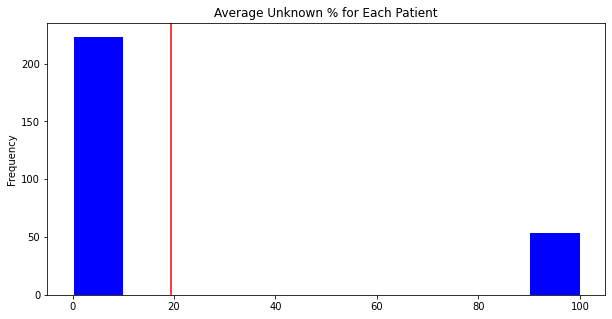

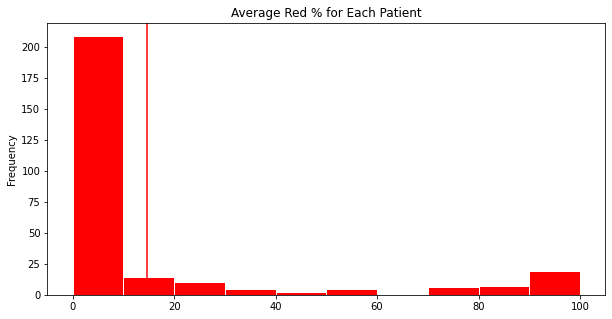

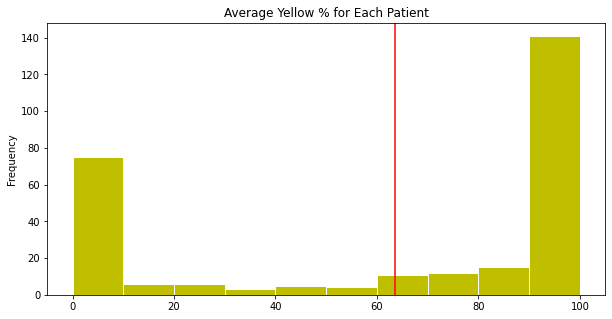

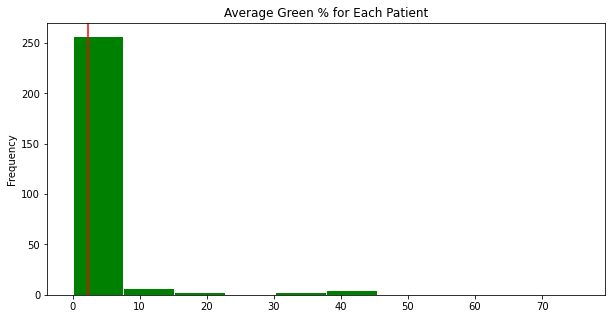

In [ ]:
HS['Unknown %'].plot.hist(color = 'b', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Unknown %'].mean(), color='r')
plt.title('Average Unknown % for Each Patient')
plt.show()
HS['Red %'].plot.hist(color = 'r', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Red %'].mean(), color='r')
plt.title('Average Red % for Each Patient')
plt.show()
HS['Yellow %'].plot.hist(color = 'y', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Yellow %'].mean(), color='r')
plt.title('Average Yellow % for Each Patient')
plt.show()
HS['Green %'].plot.hist(color = 'g', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HS['Green %'].mean(), color='r')
plt.title('Average Green % for Each Patient')
plt.show()

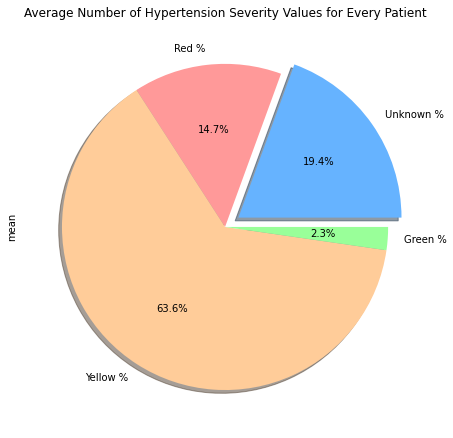

In [ ]:
HS.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Number of Hypertension Severity Values for Every Patient')
plt.show()

## HYPERTENSION VISIT

### Univariate

In [ ]:
dta[dta.HYPERTENSION_VISIT == 1].groupby('PATIENT_NUM')['HYPERTENSION_VISIT'].count()

PATIENT_NUM
1091        39
83369       22
127948      22
135797      37
157037       4
            ..
28305113    16
29154764    26
30048752    17
31151244     1
32109245    14
Name: HYPERTENSION_VISIT, Length: 276, dtype: int64

In [ ]:
HV = pd.concat({'Hypertension Visits': dta[dta.HYPERTENSION_VISIT == 1].groupby('PATIENT_NUM')['HYPERTENSION_VISIT'].count(), 'Total_Number_of_Visits': dta.groupby('PATIENT_NUM').index.count()}, axis = 1)
HV['Hypertension_Visits %'] = HV['Hypertension Visits'] / HV['Total_Number_of_Visits'] * 100

In [ ]:
HV

,Hypertension Visits,Total_Number_of_Visits,Hypertension_Visits %
PATIENT_NUM,,,
1091,39.0,123,31.707317
83369,22.0,309,7.119741
127948,22.0,104,21.153846
135797,37.0,188,19.680851
157037,4.0,97,4.123711
...,...,...,...
28305113,16.0,59,27.118644
29154764,26.0,88,29.545455
30048752,17.0,71,23.943662


In [ ]:
CLUSTER = CLUSTER.merge(HV.iloc[:, 1:], on = 'PATIENT_NUM')

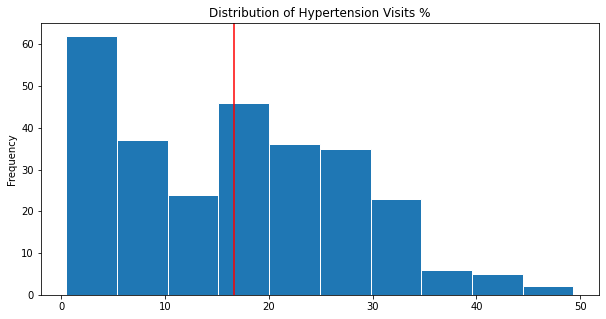

In [ ]:
HV['Hypertension_Visits %'].plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(HV['Hypertension_Visits %'].mean(), color='r')
plt.title('Distribution of Hypertension Visits %')
plt.show()

In [ ]:
HV['Hypertension_Visits %'].describe()

count    276.000000
mean      16.665038
std       10.985414
min        0.458716
25%        6.109432
50%       16.519174
75%       25.000000
max       49.350649
Name: Hypertension_Visits %, dtype: float64

## HYPERTENSION STATUS

### Univariate

In [ ]:
dta['HYPERTENSION_STATUS'][dta['HYPERTENSION_STATUS'].isnull()].count()

0

In [ ]:
dta.HYPERTENSION_STATUS.value_counts()

3    22045
2    15996
0    14652
1     4746
Name: HYPERTENSION_STATUS, dtype: int64

In [ ]:
HST = pd.concat({'Unknown': dta[dta.HYPERTENSION_STATUS == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.HYPERTENSION_STATUS == 1].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.HYPERTENSION_STATUS == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.HYPERTENSION_STATUS == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)

In [ ]:
HST.fillna(0, inplace = True)

In [ ]:
HST = HST.astype('int')

In [ ]:
HST['HST Unknown %'] = HST.Unknown / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100
HST['HST Red %'] = HST.Red / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100
HST['HST Yellow %'] = HST.Yellow / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100
HST['HST Green %'] = HST.Green / (HST.Unknown + HST.Red + HST.Yellow + HST.Green) * 100

In [ ]:
HST

,Unknown,Red,Yellow,Green,HST Unknown %,HST Red %,HST Yellow %,HST Green %
PATIENT_NUM,,,,,,,,
1091,0,0,27,96,0.0,0.000000,21.951220,78.048780
83369,0,0,0,309,0.0,0.000000,0.000000,100.000000
127948,0,0,37,67,0.0,0.000000,35.576923,64.423077
135797,0,0,131,57,0.0,0.000000,69.680851,30.319149
157037,0,0,97,0,0.0,0.000000,100.000000,0.000000
...,...,...,...,...,...,...,...,...
28305113,0,0,46,13,0.0,0.000000,77.966102,22.033898
29154764,0,5,14,69,0.0,5.681818,15.909091,78.409091
30048752,0,0,7,64,0.0,0.000000,9.859155,90.140845


In [ ]:
CLUSTER = CLUSTER.merge(HST.iloc[:,4:], on = 'PATIENT_NUM')

In [ ]:
HST.iloc[:,4:].describe()

,HST Unknown %,HST Red %,HST Yellow %,HST Green %
count,278.000000,278.000000,278.000000,278.000000
mean,19.064748,10.342201,30.600729,39.992322
std,39.352009,23.834332,29.281119,31.315452
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.954936
50%,0.000000,0.000000,22.113051,36.947506
75%,0.000000,4.390443,58.192086,63.598901
max,100.000000,100.000000,100.000000,100.000000


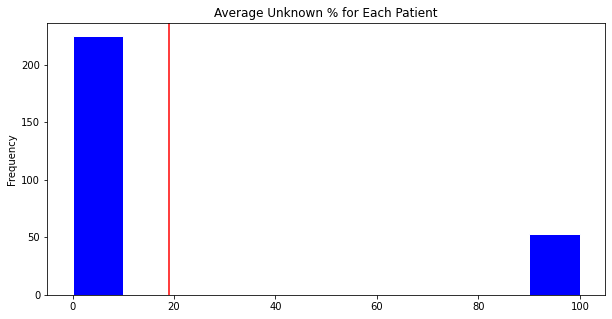

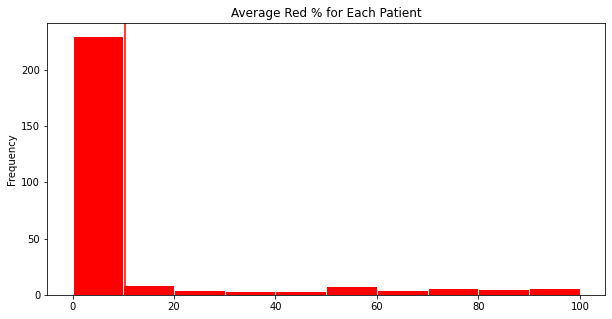

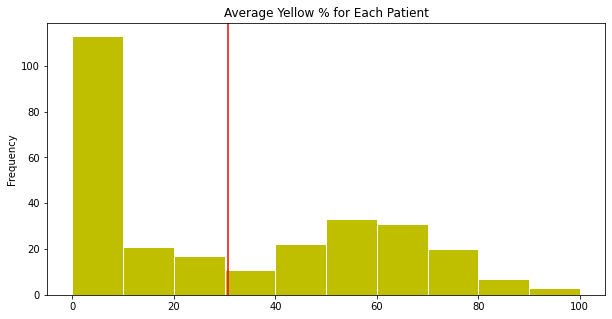

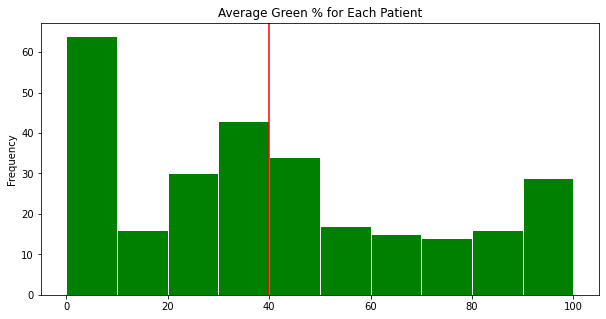

In [ ]:
HST['HST Unknown %'].plot.hist(color = 'b', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Unknown %'].mean(), color='r')
plt.title('Average Unknown % for Each Patient')
plt.show()
HST['HST Red %'].plot.hist(color = 'r', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Red %'].mean(), color='r')
plt.title('Average Red % for Each Patient')
plt.show()
HST['HST Yellow %'].plot.hist(color = 'y', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Yellow %'].mean(), color='r')
plt.title('Average Yellow % for Each Patient')
plt.show()
HST['HST Green %'].plot.hist(color = 'g', figsize = (10, 5), edgecolor = 'w')
plt.axvline(HST['HST Green %'].mean(), color='r')
plt.title('Average Green % for Each Patient')
plt.show()

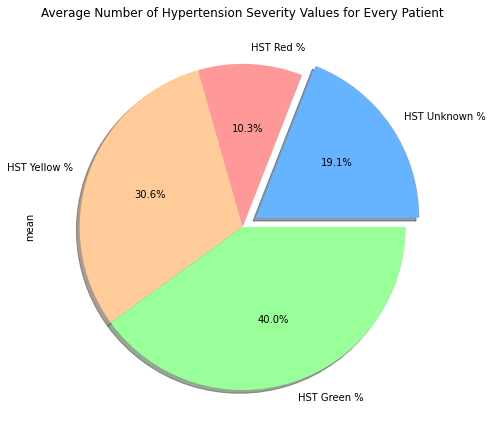

In [ ]:
HST.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Number of Hypertension Severity Values for Every Patient')
plt.show()

## INDEX

### Univariate

In [ ]:
len(dta.index[dta.index.isnull()])

0

In [ ]:
dta.groupby('PATIENT_NUM')['index'].count().sort_values()

PATIENT_NUM
31151244      4
16852584     46
26797076     49
26104907     51
5643472      55
           ... 
6444150     480
1175181     566
261519      569
1715533     658
4752824     784
Name: index, Length: 278, dtype: int64

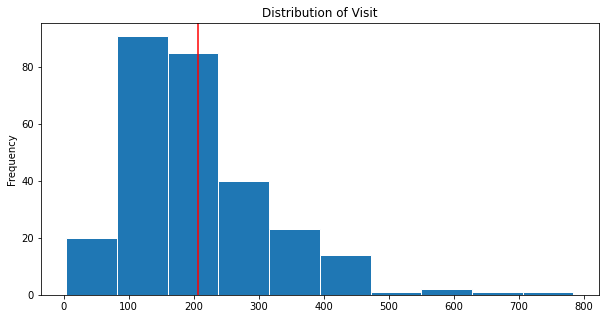

In [ ]:
dta.groupby('PATIENT_NUM')['index'].count().sort_values().plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(dta.groupby('PATIENT_NUM')['index'].count().sort_values().mean(), color='r')
plt.title('Distribution of Visit')
plt.show()

In [ ]:
dta.groupby('PATIENT_NUM')['index'].count().sort_values().describe()

count    278.000000
mean     206.615108
std      109.984013
min        4.000000
25%      126.250000
50%      190.500000
75%      258.500000
max      784.000000
Name: index, dtype: float64

### Multivariate

In [ ]:
for file in file_list:
  if len(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY != 0][dta.PATIENT_NUM == file]) == 0:
    continue
  else:
    plt.scatter(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'r')
    plt.plot(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 1][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'r')
    plt.scatter(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'y')
    plt.plot(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 2][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'y')
    plt.scatter(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'g')
    plt.plot(dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['index'], dta[['HYPERTENSION_SEVERITY', 'index']][dta.HYPERTENSION_SEVERITY == 3][dta.PATIENT_NUM == file]['HYPERTENSION_SEVERITY'], color = 'g')
    plt.xlabel('Visit')
    plt.ylabel('Hypertension Severity')
    plt.title('Hypertension Severity VS Visit')
    plt.show()

## ADMIT DATE

### Univariate

In [ ]:
dta.ADMIT_DATE[dta.ADMIT_DATE.isnull()].count()

0

In [ ]:
AD = pd.concat({'MIN_ADMIT_DATE': dta.groupby('PATIENT_NUM')['ADMIT_DATE'].min(), 'MAX_ADMIT_DATE': dta.groupby('PATIENT_NUM')['ADMIT_DATE'].max(),  'Total_Number_of_Visits': dta.groupby('PATIENT_NUM').index.count()}, axis = 1)
AD['MIN_ADMIT_DATE'] = pd.to_datetime(AD['MIN_ADMIT_DATE'])
AD['MAX_ADMIT_DATE'] = pd.to_datetime(AD['MAX_ADMIT_DATE'])
AD['Days'] = AD['MAX_ADMIT_DATE'] - AD['MIN_ADMIT_DATE']
AD['Days_Int'] = AD['Days']/np.timedelta64(1, 'D')
AD['Years'] = AD['Days'] / np.timedelta64(1, 'Y')
AD['Years'] = AD['Years'].round().astype('int')
AD['Visit_Frequency (Days between Visit)'] = AD['Days_Int'] / AD['Total_Number_of_Visits']
AD = AD.drop(['Total_Number_of_Visits', 'Days', 'Days_Int'], axis = 1)

In [ ]:
AD

,MIN_ADMIT_DATE,MAX_ADMIT_DATE,Years,Visit_Frequency (Days between Visit)
PATIENT_NUM,,,,
1091,2004-10-06,2013-09-26,9,26.642276
83369,1996-08-19,2015-11-18,19,22.750809
127948,1994-05-22,2018-01-30,24,83.211538
135797,1995-11-14,2015-12-11,20,39.000000
157037,1995-11-07,2014-05-08,19,69.659794
...,...,...,...,...
28305113,2010-04-12,2014-12-30,5,29.203390
29154764,2011-06-17,2013-05-30,2,8.102273
30048752,2012-09-25,2015-11-13,3,16.112676


In [ ]:
CLUSTER = CLUSTER.merge(AD['Years'], on = 'PATIENT_NUM')

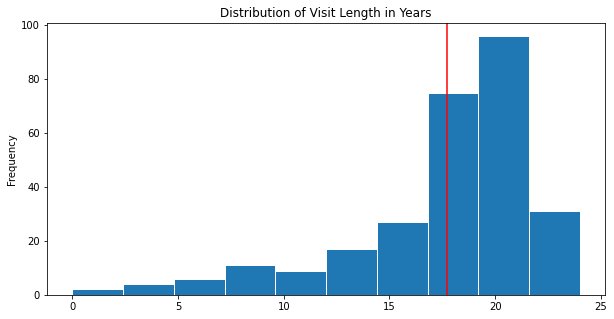

In [ ]:
AD.Years.plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(AD.Years.mean(), color='r')
plt.title('Distribution of Visit Length in Years')
plt.show()

In [ ]:
AD.Years.describe()

count    278.000000
mean      17.697842
std        4.512565
min        0.000000
25%       16.000000
50%       19.000000
75%       21.000000
max       24.000000
Name: Years, dtype: float64

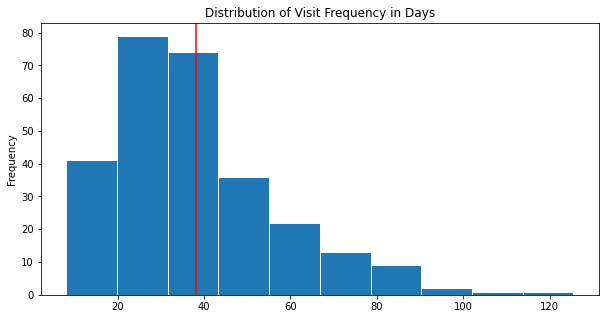

In [ ]:
AD['Visit_Frequency (Days between Visit)'].plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(AD['Visit_Frequency (Days between Visit)'].mean(), color='r')
plt.title('Distribution of Visit Frequency in Days')
plt.show()

In [ ]:
AD['Visit_Frequency (Days between Visit)'].describe()

count    278.000000
mean      38.100675
std       19.248542
min        8.102273
25%       24.289967
50%       33.838247
75%       47.731763
max      125.490909
Name: Visit_Frequency (Days between Visit), dtype: float64

## GENDER

### Univariate

In [ ]:
dta.GENDER[dta.GENDER.isnull()].count()

0

In [ ]:
dta.groupby('PATIENT_NUM')['GENDER'].min()

PATIENT_NUM
1091        1
83369       1
127948      2
135797      1
157037      2
           ..
28305113    2
29154764    1
30048752    2
31151244    2
32109245    2
Name: GENDER, Length: 278, dtype: int64

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['GENDER'].min(), on = 'PATIENT_NUM')

In [ ]:
dta.groupby('PATIENT_NUM')['GENDER'].min().value_counts()

1    141
2    137
Name: GENDER, dtype: int64

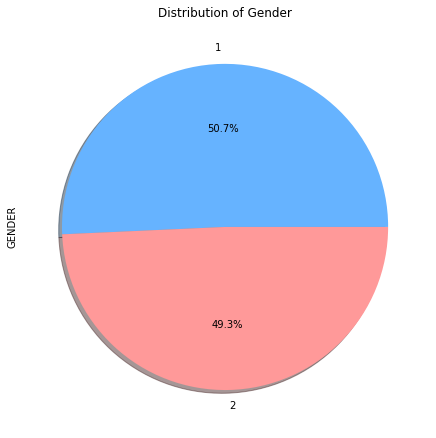

In [ ]:
dta.groupby('PATIENT_NUM')['GENDER'].min().value_counts().plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

### Multivariate

In [ ]:
HSA = pd.concat({'Unknown': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 1].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.GENDER == 1][dta.HYPERTENSION_SEVERITY == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)
HSA.fillna(0, inplace = True)
HSA = HSA.astype('int')
HSA['Unknown %'] = HSA.Unknown / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Red %'] = HSA.Red / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Yellow %'] = HSA.Yellow / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Green %'] = HSA.Green / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100

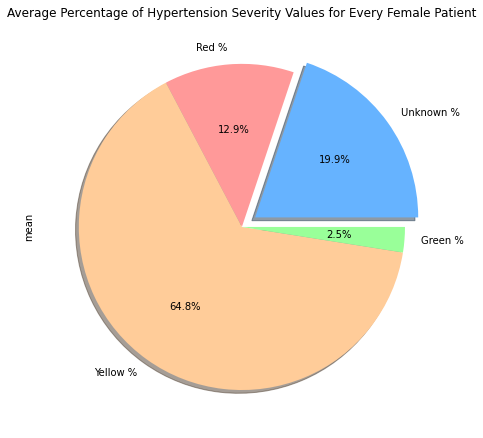

In [ ]:
HSA.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Percentage of Hypertension Severity Values for Every Female Patient')
plt.show()

In [ ]:
HSA = pd.concat({'Unknown': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 0].groupby('PATIENT_NUM')['index'].count(), 'Red': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(),  'Yellow': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 2].groupby('PATIENT_NUM')['index'].count(), 'Green': dta[dta.GENDER == 2][dta.HYPERTENSION_SEVERITY == 3].groupby('PATIENT_NUM')['index'].count()}, axis = 1)
HSA.fillna(0, inplace = True)
HSA = HSA.astype('int')
HSA['Unknown %'] = HSA.Unknown / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Red %'] = HSA.Red / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Yellow %'] = HSA.Yellow / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100
HSA['Green %'] = HSA.Green / (HSA.Unknown + HSA.Red + HSA.Yellow + HSA.Green) * 100

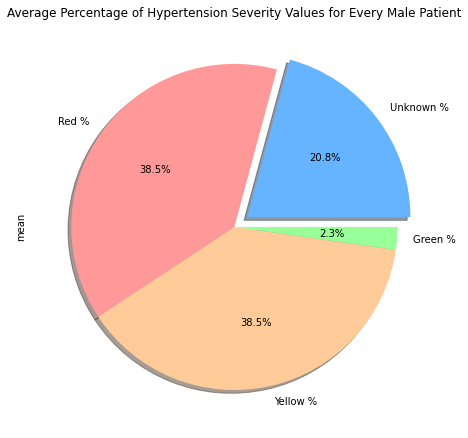

In [ ]:
HSA.iloc[:,4:].describe().iloc[1].plot.pie(colors = ['#66b3ff', '#ff9999','#ffcc99', '#99ff99'], shadow = True, explode = (0.1, 0, 0, 0), figsize=(15, 7.5), autopct='%1.1f%%')
plt.title('Average Percentage of Hypertension Severity Values for Every Male Patient')
plt.show()

## AGE

### Univariate

In [ ]:
dta.AGE[dta.AGE.isnull()].count()

0

In [ ]:
dta.groupby('PATIENT_NUM')['AGE'].min().astype('int')

PATIENT_NUM
1091        80
83369       65
127948      50
135797      50
157037      40
            ..
28305113    50
29154764    90
30048752    85
31151244    60
32109245    65
Name: AGE, Length: 278, dtype: int64

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['AGE'].min().astype('int'), on = 'PATIENT_NUM')

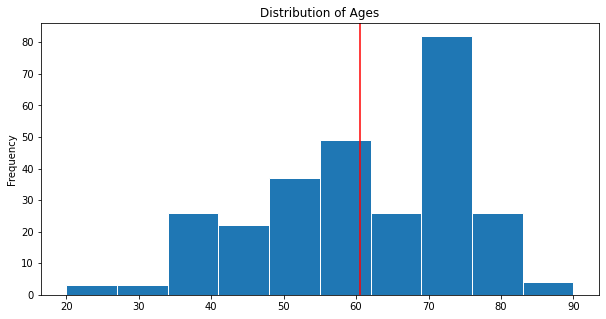

In [ ]:
dta.groupby('PATIENT_NUM')['AGE'].min().astype('int').plot.hist(figsize = (10, 5), edgecolor = 'w')
plt.axvline(dta.groupby('PATIENT_NUM')['AGE'].min().astype('int').mean(), color='r')
plt.title('Distribution of Ages')
plt.show()

In [ ]:
dta.groupby('PATIENT_NUM')['AGE'].min().astype('int').describe()

count    278.000000
mean      60.485612
std       13.563521
min       20.000000
25%       50.000000
50%       60.000000
75%       70.000000
max       90.000000
Name: AGE, dtype: float64

### Multivariate

In [ ]:
HS['First Age'] = dta.groupby('PATIENT_NUM')['AGE'].min().astype('int')

In [ ]:
HS

,Unknown,Red,Yellow,Green,Unknown %,Red %,Yellow %,Green %,First Age
PATIENT_NUM,,,,,,,,,
1091,0,0,123,0,0.0,0.000000,100.000000,0.000000,80
83369,0,0,309,0,0.0,0.000000,100.000000,0.000000,65
127948,0,0,95,9,0.0,0.000000,91.346154,8.653846,50
135797,0,0,188,0,0.0,0.000000,100.000000,0.000000,50
157037,0,0,97,0,0.0,0.000000,100.000000,0.000000,40
...,...,...,...,...,...,...,...,...,...
28305113,0,59,0,0,0.0,100.000000,0.000000,0.000000,50
29154764,0,52,36,0,0.0,59.090909,40.909091,0.000000,90
30048752,0,0,71,0,0.0,0.000000,100.000000,0.000000,85


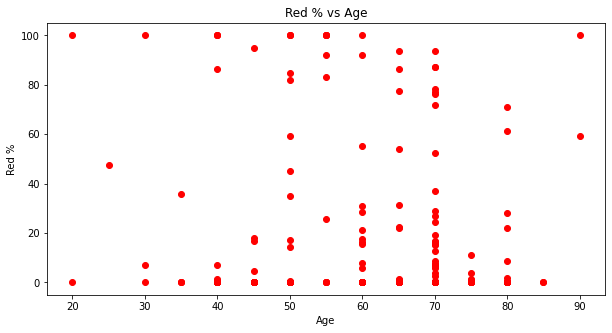

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['First Age'], HS['Red %'], color = 'r')
plt.xlabel('Age')
plt.ylabel('Red %')
plt.title('Red % vs Age')
plt.show()

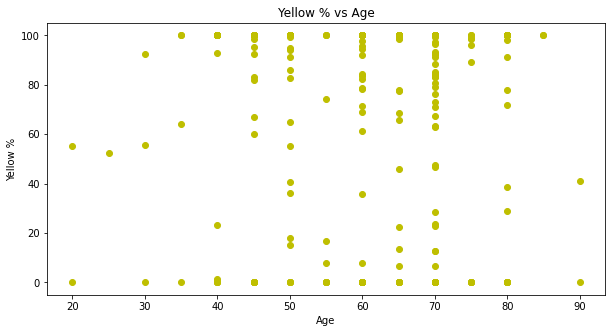

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['First Age'], HS['Yellow %'], color = 'y')
plt.xlabel('Age')
plt.ylabel('Yellow %')
plt.title('Yellow % vs Age')
plt.show()

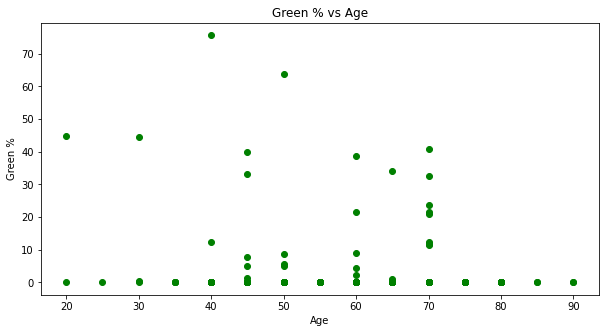

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['First Age'], HS['Green %'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Green %')
plt.title('Green % vs Age')
plt.show()

## FAMILY_HYPERTENSION_NUM

### Univariate

In [ ]:
dta.FAMILY_HYPERTENSION_NUM[dta.FAMILY_HYPERTENSION_NUM.isnull()].count()

0

In [ ]:
dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max()

PATIENT_NUM
1091        0
83369       0
127948      1
135797      0
157037      0
           ..
28305113    2
29154764    0
30048752    0
31151244    0
32109245    0
Name: FAMILY_HYPERTENSION_NUM, Length: 278, dtype: int64

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max(), on = 'PATIENT_NUM')

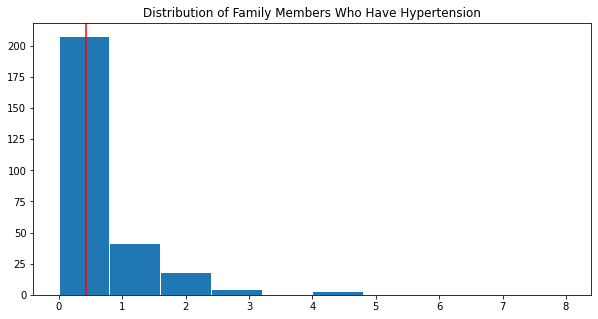

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max(), edgecolor = 'w')
plt.axvline(dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max().mean(), color='r')
plt.title('Distribution of Family Members Who Have Hypertension')
plt.show()

In [ ]:
dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max().describe()

count    278.000000
mean       0.424460
std        0.942218
min        0.000000
25%        0.000000
50%        0.000000
75%        0.750000
max        8.000000
Name: FAMILY_HYPERTENSION_NUM, dtype: float64

### Multivariate

In [ ]:
HS['FAMILY_HYPERTENSION_NUM'] = dta.groupby('PATIENT_NUM')['FAMILY_HYPERTENSION_NUM'].max()

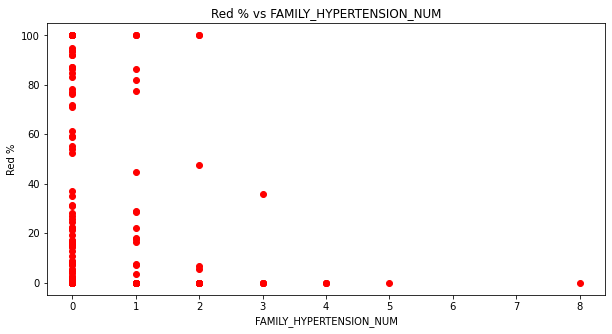

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['FAMILY_HYPERTENSION_NUM'], HS['Red %'], color = 'r')
plt.xlabel('FAMILY_HYPERTENSION_NUM')
plt.ylabel('Red %')
plt.title('Red % vs FAMILY_HYPERTENSION_NUM')
plt.show()

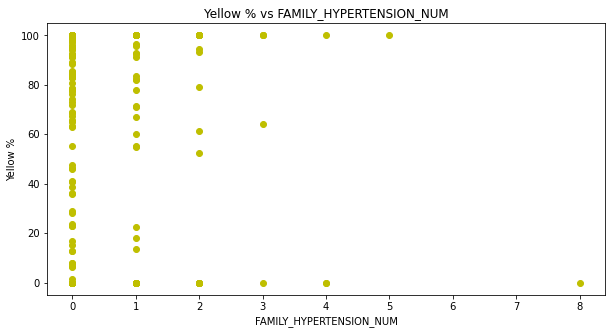

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['FAMILY_HYPERTENSION_NUM'], HS['Yellow %'], color = 'y')
plt.xlabel('FAMILY_HYPERTENSION_NUM')
plt.ylabel('Yellow %')
plt.title('Yellow % vs FAMILY_HYPERTENSION_NUM')
plt.show()

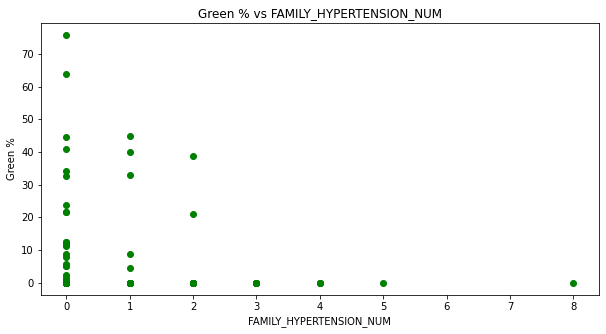

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(HS['FAMILY_HYPERTENSION_NUM'], HS['Green %'], color = 'g')
plt.xlabel('FAMILY_HYPERTENSION_NUM')
plt.ylabel('Green %')
plt.title('Green % vs FAMILY_HYPERTENSION_NUM')
plt.show()

## NON_SMOKER, NON_DRINKER, REGULAR_EXERCISER, NON_ALLERGY

In [ ]:
social_history = dta[['NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY']].reset_index()

In [ ]:
social_history = social_history.drop(columns=['code'])

In [ ]:
social_history

,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
57434,1,0,0,0
57435,1,0,0,0
57436,1,0,0,0
57437,1,0,0,0


In [ ]:
df_social_hx = social_history.apply(pd.Series.value_counts)
df_social_hx.rename(index={0:'NO', 1: 'YES'}, inplace=True)
df_social_hx

,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY
NO,25056,42474,46072,51751
YES,32383,14965,11367,5688


In [ ]:
df_social_hx = df_social_hx.T
df_social_hx.index.name = 'Social Type'
df_social_hx

,NO,YES
Social Type,,
NON_SMOKER,25056,32383
NON_DRINKER,42474,14965
REGULAR_EXERCISER,46072,11367
NON_ALLERGY,51751,5688


In [ ]:
df_social_hx_prop = df_social_hx.apply(lambda x: x/sum(x), axis=1)
df_social_hx_prop

,NO,YES
Social Type,,
NON_SMOKER,0.436219,0.563781
NON_DRINKER,0.739463,0.260537
REGULAR_EXERCISER,0.802103,0.197897
NON_ALLERGY,0.900973,0.099027


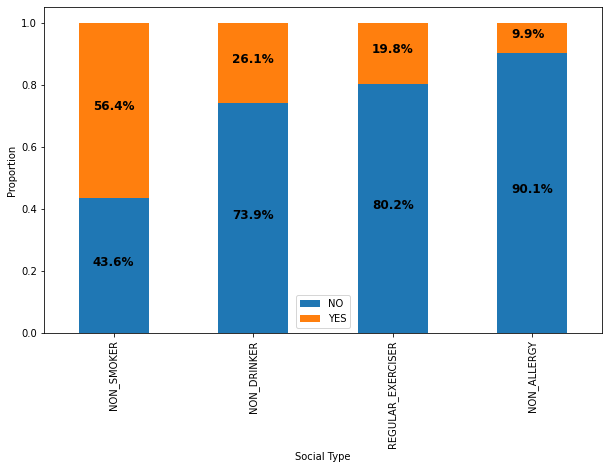

In [ ]:
#ax = df_social_hx.plot.barh(stacked=True, figsize=(10,7))
df_social_hx_prop.plot(kind='bar',
                        stacked=True, 
                        figsize=(10, 6))
plt.xlabel("Social Type")
plt.ylabel("Proportion")


for n, x in enumerate([*df_social_hx.index.values]):
    for (proportion, y_loc) in zip(df_social_hx_prop.loc[x],
                                   df_social_hx_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.15,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['NON_SMOKER'].min(), on = 'PATIENT_NUM')
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['NON_DRINKER'].min(), on = 'PATIENT_NUM')
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['REGULAR_EXERCISER'].min(), on = 'PATIENT_NUM')
CLUSTER = CLUSTER.merge(dta.groupby('PATIENT_NUM')['NON_ALLERGY'].min(), on = 'PATIENT_NUM')

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY
PATIENT_NUM,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0
83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0
127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0
135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0
157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0
29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0
30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0


## HOS_PERIOD

In [ ]:
dta['HOS_PERIOD'].unique()

array([  0,   3,   1,   5,   6,   4,   9,  16,  10,  -4,   7,   2,  -6,
        26,   8,  18, -34,  64, -27, -68,  14,  -5, -54,  11,  13, 339,
        89, -69,  83,  15, 104,  12,  -7, -39,  22, -91,  31,  -3])

In [ ]:
dta['HOS_PERIOD'].value_counts()

 0      56810
 1        244
 2         93
 3         69
 4         60
 5         45
 6         32
 7         14
 8          8
 9          6
 10         6
 13         6
 11         6
 12         6
-4          5
 14         3
 15         2
-27         2
 26         2
 31         2
-7          1
-39         1
 22         1
 104        1
-69         1
-91         1
 83         1
-68         1
 89         1
 339        1
-54         1
-5          1
 64         1
-34         1
 18         1
-6          1
 16         1
-3          1
Name: HOS_PERIOD, dtype: int64

### 1.Hospital period for hypertension visits

In [ ]:
extracted_hypertension_visits = dta[dta['HYPERTENSION_VISIT']==1]

In [ ]:
extracted_hypertension_visits["HOS_PERIOD"].value_counts()

 0     8587
 1       11
 3        4
 6        3
 2        2
 4        2
-6        1
 5        1
-68       1
-5        1
 13       1
-69       1
-4        1
 10       1
 12       1
Name: HOS_PERIOD, dtype: int64

In [ ]:
extracted_hos = extracted_hypertension_visits[['HOS_PERIOD']]

In [ ]:
df_extracted_hos = extracted_hos.apply(pd.Series.value_counts).rename_axis('DAYS').reset_index()
df_extracted_hos = df_extracted_hos.sort_values(by=['DAYS'])
df_extracted_hos

,DAYS,HOS_PERIOD
11,-69,1
8,-68,1
6,-6,1
9,-5,1
12,-4,1
0,0,8587
1,1,11
4,2,2
2,3,4
5,4,2


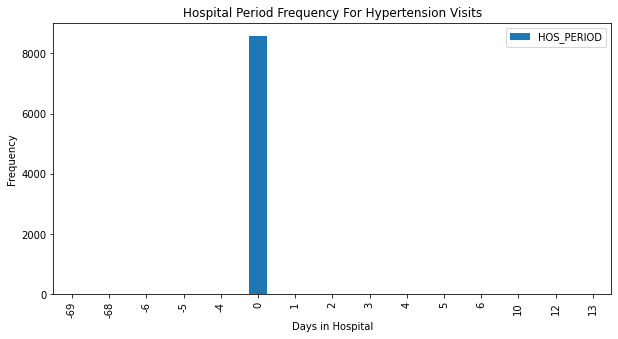

In [ ]:
df_extracted_hos.plot(kind='bar', x='DAYS', y='HOS_PERIOD', figsize=(10,5), title = 'Hospital Period Frequency For Hypertension Visits')
plt.xlabel("Days in Hospital")
plt.ylabel("Frequency")
plt.show()

### 2.Hospital period for all visits

In [ ]:
hos_period = dta[['HOS_PERIOD']]

In [ ]:
hos_period = hos_period.apply(pd.Series.value_counts)

In [ ]:
filtered_hos_period = hos_period[1:].rename_axis('DAYS').reset_index()
filtered_hos_period = filtered_hos_period[(filtered_hos_period['DAYS']>=0) & (filtered_hos_period['HOS_PERIOD']>6)]
filtered_hos_period

,DAYS,HOS_PERIOD
0,1,244
1,2,93
2,3,69
3,4,60
4,5,45
5,6,32
6,7,14
7,8,8


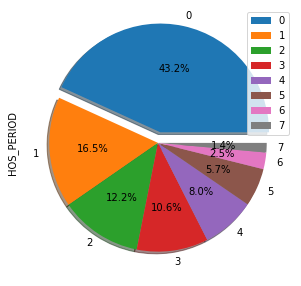

In [ ]:
explode = (0.1,0,0,0,0,0,0,0)
filtered_hos_period.plot.pie(y='HOS_PERIOD', figsize=(10, 5), shadow = True, explode = explode,autopct='%1.1f%%')
#filtered_hos_period.plot.pie(y='HOS_PERIOD', figsize=(10, 5),autopct='%1.1f%%')
plt.show()

### 3. Hospital period for each hypertension severity

In [ ]:
severity_zero = dta[dta['HYPERTENSION_SEVERITY']==0][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 0
severity_one = dta[dta['HYPERTENSION_SEVERITY']==1][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 1
severity_two = dta[dta['HYPERTENSION_SEVERITY']==2][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 2
severity_three = dta[dta['HYPERTENSION_SEVERITY']==3][['HOS_PERIOD']].apply(pd.Series.value_counts) # severity is 3
filtered_severity_zero = severity_zero[1:].rename_axis('DAYS').reset_index()
filtered_severity_zero = filtered_severity_zero[(filtered_severity_zero['DAYS']>=0) & (filtered_severity_zero['HOS_PERIOD']>6)]

In [ ]:
filtered_severity_zero

,DAYS,HOS_PERIOD
0,1,69
1,2,25
2,4,21
3,3,14
4,5,13
5,6,9


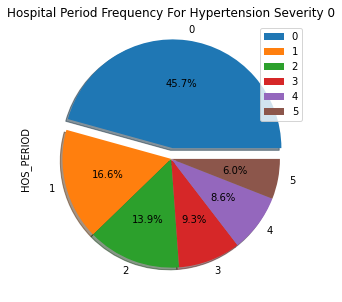

In [ ]:
explode = (0.1,0,0,0,0,0)
filtered_severity_zero.plot.pie(y='HOS_PERIOD', figsize=(10,5), shadow = True, explode = explode,autopct='%1.1f%%')
plt.title('Hospital Period Frequency For Hypertension Severity 0')
plt.show()

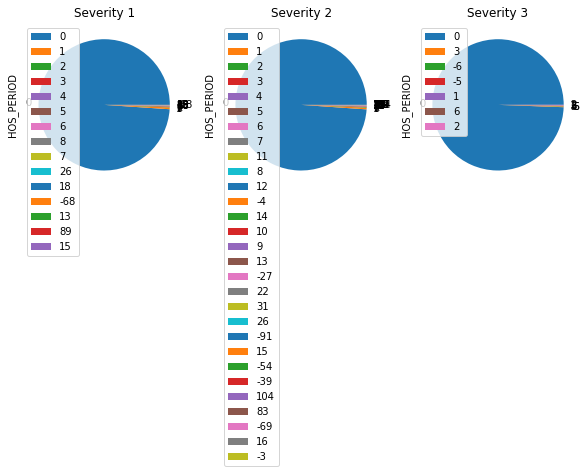

In [ ]:
fig, ((ax0, ax1, ax2)) = plt.subplots(nrows = 1, ncols = 3, figsize=(10,6))

severity_one.plot.pie(ax=ax0, y='HOS_PERIOD', title = 'Severity 1')
severity_two.plot.pie(ax=ax1, y='HOS_PERIOD', title = 'Severity 2')
severity_three.plot.pie(ax=ax2, y='HOS_PERIOD', title = 'Severity 3')

plt.show()

In [ ]:
#CLUSTER = CLUSTER.merge(extracted_hypertension_visits.groupby('PATIENT_NUM')['HOS_PERIOD'].sum(), on = 'PATIENT_NUM')

## DIASTOLIC_BP, SYSTOLIC_BP

### Analysis

In [ ]:
non_hypertension_high_bp = dta[(dta['HYPERTENSION_VISIT']==0) & (dta['DIASTOLIC_BP']>=80) & (dta['SYSTOLIC_BP']>=130)][['DIASTOLIC_BP', 'SYSTOLIC_BP']]

In [ ]:
non_hypertension_high_bp

,DIASTOLIC_BP,SYSTOLIC_BP
code,,
1169720,94.0,164.0
8390829,80.0,135.0
14795558,82.0,160.0
14888843,80.0,160.0
22136851,80.0,136.0
...,...,...
13204544,86.0,132.0
14789293,86.0,170.0
26024981,80.0,180.0


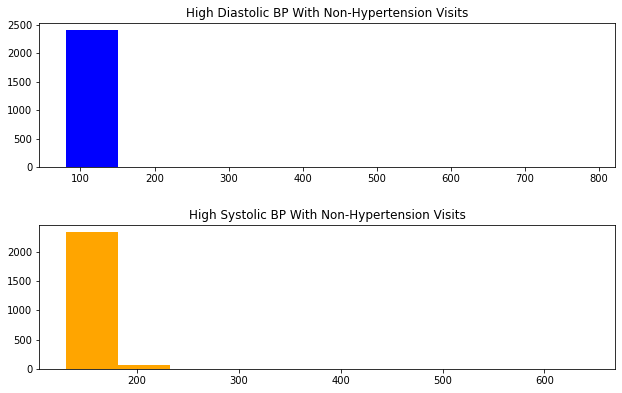

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols = 1, figsize=(10,6))
ax0.hist(non_hypertension_high_bp.DIASTOLIC_BP,color='blue')
ax0.set_title('High Diastolic BP With Non-Hypertension Visits')

ax1.hist(non_hypertension_high_bp.SYSTOLIC_BP,color='orange')
ax1.set_title('High Systolic BP With Non-Hypertension Visits')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### Action

In [ ]:
DBP_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()]) != 0:
    DBP_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()].to_numpy())
  else:
    DBP_time.append(np.array([1, 2, 3]))

In [ ]:
DBP_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()]) != 0:
    DBP_value.append(dta['DIASTOLIC_BP'][dta['PATIENT_NUM'] == patient][dta['DIASTOLIC_BP'].notnull()].to_numpy())
  else:
    DBP_value.append(np.array([0, 0, 0]))

In [ ]:
DBP_features_to_use = ["mean", 
                   "maximum",
                   "minimum",
                   "median",
                   "std",
                   "skew",
                   "amplitude"]

DBP = featurize.featurize_time_series(times = DBP_time, values = DBP_value,
                                     errors = None,
                                     features_to_use = DBP_features_to_use)

In [ ]:
DBP.columns = DBP.columns.get_level_values(0)

In [ ]:
DBP['DBP_Mean'] = DBP.iloc[ : , 0]
DBP['DBP_Max'] = DBP.iloc[ : , 1]
DBP['DBP_Min'] = DBP.iloc[ : , 2]
DBP['DBP_Med'] = DBP.iloc[ : , 3]
DBP['DBP_Std'] = DBP.iloc[ : , 4]
DBP['DBP_Skew'] = DBP.iloc[ : , 5]
DBP['DBP_Amp'] = DBP.iloc[ : , 6]

In [ ]:
DBP.drop(DBP.iloc[:, 0:7], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, DBP], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0
83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5
127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0
135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5
157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0
29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0
30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0


In [ ]:
SBP_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()]) != 0:
    SBP_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()].to_numpy())
  else:
    SBP_time.append(np.array([1, 2, 3]))

In [ ]:
SBP_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()]) != 0:
    SBP_value.append(dta['SYSTOLIC_BP'][dta['PATIENT_NUM'] == patient][dta['SYSTOLIC_BP'].notnull()].to_numpy())
  else:
    SBP_value.append(np.array([0, 0, 0]))

In [ ]:
SBP_features_to_use = ["mean", 
                   "maximum",
                   "minimum",
                   "median",
                   "std",
                   "skew",
                   "amplitude"]

SBP = featurize.featurize_time_series(times = SBP_time, values = SBP_value,
                                     errors = None,
                                     features_to_use = SBP_features_to_use)

In [ ]:
SBP.columns = SBP.columns.get_level_values(0)

In [ ]:
SBP['SBP_Mean'] = SBP.iloc[ : , 0]
SBP['SBP_Max'] = SBP.iloc[ : , 1]
SBP['SBP_Min'] = SBP.iloc[ : , 2]
SBP['SBP_Med'] = SBP.iloc[ : , 3]
SBP['SBP_Std'] = SBP.iloc[ : , 4]
SBP['SBP_Skew'] = SBP.iloc[ : , 5]
SBP['SBP_Amp'] = SBP.iloc[ : , 6]

In [ ]:
SBP.drop(SBP.iloc[:, 0:7], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, SBP], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.DBP_Mean[CLUSTER.DBP_Mean < 1]

PATIENT_NUM
31151244    0.0
Name: DBP_Mean, dtype: float64

In [ ]:
CLUSTER.SBP_Mean[CLUSTER.SBP_Mean < 1]

PATIENT_NUM
31151244    0.0
Name: SBP_Mean, dtype: float64

## WEIGHT

### Action

In [ ]:
WEIGHT_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()]) != 0:
    WEIGHT_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()].to_numpy())
  else:
    WEIGHT_time.append(np.array([1, 2, 3]))

In [ ]:
WEIGHT_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()]) != 0:
    WEIGHT_value.append(dta['WEIGHT'][dta['PATIENT_NUM'] == patient][dta['WEIGHT'].notnull()].to_numpy())
  else:
    WEIGHT_value.append(np.array([0, 0, 0]))

In [ ]:
WEIGHT_features_to_use = ["mean", 
                   "maximum",
                   "minimum",
                   "median",
                   "std",
                   "skew",
                   "amplitude"]

WEIGHT = featurize.featurize_time_series(times = WEIGHT_time, values = WEIGHT_value,
                                     errors = None,
                                     features_to_use = WEIGHT_features_to_use)

In [ ]:
WEIGHT.columns = WEIGHT.columns.get_level_values(0)

In [ ]:
WEIGHT['WEIGHT_Mean'] = WEIGHT.iloc[ : , 0]
WEIGHT['WEIGHT_Max'] = WEIGHT.iloc[ : , 1]
WEIGHT['WEIGHT_Min'] = WEIGHT.iloc[ : , 2]
WEIGHT['WEIGHT_Med'] = WEIGHT.iloc[ : , 3]
WEIGHT['WEIGHT_Std'] = WEIGHT.iloc[ : , 4]
WEIGHT['WEIGHT_Skew'] = WEIGHT.iloc[ : , 5]
WEIGHT['WEIGHT_Amp'] = WEIGHT.iloc[ : , 6]

In [ ]:
WEIGHT.drop(WEIGHT.iloc[:, 0:7], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, WEIGHT], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.WEIGHT_Mean[CLUSTER.WEIGHT_Mean < 1]

PATIENT_NUM
4065771     0.0
31151244    0.0
Name: WEIGHT_Mean, dtype: float64

## HEIGHT

### Action

In [ ]:
HEIGHT_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()]) != 0:
    HEIGHT_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()].to_numpy())
  else:
    HEIGHT_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in HEIGHT_time:
  count += 1
  if len(patient) == 1:
    HEIGHT_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
HEIGHT_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()]) != 0:
    HEIGHT_value.append(dta['HEIGHT'][dta['PATIENT_NUM'] == patient][dta['HEIGHT'].notnull()].to_numpy())
  else:
    HEIGHT_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in HEIGHT_value:
  count += 1
  if len(patient) == 1:
    HEIGHT_value[count] = np.append(patient, patient[0])

In [ ]:
HEIGHT_features_to_use = ["mean"]
HEIGHT = featurize.featurize_time_series(times = HEIGHT_time, values = HEIGHT_value, errors = None, features_to_use = HEIGHT_features_to_use)

In [ ]:
HEIGHT.columns = HEIGHT.columns.get_level_values(0)

In [ ]:
HEIGHT['HEIGHT_Mean'] = HEIGHT.iloc[ : , 0]

In [ ]:
HEIGHT.drop(HEIGHT.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, HEIGHT], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.HEIGHT_Mean[CLUSTER.HEIGHT_Mean < 1]

PATIENT_NUM
1091        0.0
616314      0.0
1015269     0.0
1187033     0.0
1612002     0.0
2453806     0.0
2683317     0.0
3383701     0.0
3410952     0.0
4192172     0.0
4253007     0.0
4752824     0.0
5025531     0.0
5077289     0.0
5126525     0.0
5498427     0.0
5643472     0.0
5692769     0.0
5804910     0.0
5944073     0.0
6268814     0.0
6290903     0.0
6444150     0.0
12074485    0.0
12193633    0.0
12200731    0.0
12828858    0.0
13474193    0.0
13774933    0.0
13977031    0.0
22012456    0.0
22200137    0.0
22721278    0.0
25778344    0.0
25827374    0.0
26129495    0.0
26210913    0.0
27077072    0.0
27251574    0.0
28305113    0.0
31151244    0.0
Name: HEIGHT_Mean, dtype: float64

In [ ]:
CLUSTER.drop('HEIGHT_Mean', axis = 1, inplace = True)

## TEMPERATURE

### Action

In [ ]:
TEMP_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()]) != 0:
    TEMP_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()].to_numpy())
  else:
    TEMP_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in TEMP_time:
  count += 1
  if len(patient) == 1:
    TEMP_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
TEMP_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()]) != 0:
    TEMP_value.append(dta['TEMPERATURE'][dta['PATIENT_NUM'] == patient][dta['TEMPERATURE'].notnull()].to_numpy())
  else:
    TEMP_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in TEMP_value:
  count += 1
  if len(patient) == 1:
    TEMP_value[count] = np.append(patient, patient[0])

In [ ]:
TEMP_features_to_use = ["mean"]
TEMP = featurize.featurize_time_series(times = TEMP_time, values = TEMP_value, errors = None, features_to_use = TEMP_features_to_use)

In [ ]:
TEMP.columns = TEMP.columns.get_level_values(0)

In [ ]:
TEMP['TEMP_Mean'] = TEMP.iloc[ : , 0]

In [ ]:
TEMP.drop(TEMP.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, TEMP], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.TEMP_Mean[CLUSTER.TEMP_Mean < 1]

PATIENT_NUM
5643472     0.0
28305113    0.0
31151244    0.0
Name: TEMP_Mean, dtype: float64

## PULSE

### Action

In [ ]:
PULSE_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()]) != 0:
    PULSE_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()].to_numpy())
  else:
    PULSE_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in PULSE_time:
  count += 1
  if len(patient) == 1:
    PULSE_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
PULSE_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()]) != 0:
    PULSE_value.append(dta['PULSE'][dta['PATIENT_NUM'] == patient][dta['PULSE'].notnull()].to_numpy())
  else:
    PULSE_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in PULSE_value:
  count += 1
  if len(patient) == 1:
    PULSE_value[count] = np.append(patient, patient[0])

In [ ]:
PULSE_features_to_use = ["mean"]
PULSE = featurize.featurize_time_series(times = PULSE_time, values = PULSE_value, errors = None, features_to_use = PULSE_features_to_use)

In [ ]:
PULSE.columns = PULSE.columns.get_level_values(0)

In [ ]:
PULSE['PULSE_Mean'] = PULSE.iloc[ : , 0]

In [ ]:
PULSE.drop(PULSE.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, PULSE], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.PULSE_Mean[CLUSTER.PULSE_Mean < 1]

PATIENT_NUM
31151244    0.0
Name: PULSE_Mean, dtype: float64

## RESPIRATION

### Action

In [ ]:
RESPIRATION_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()]) != 0:
    RESPIRATION_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()].to_numpy())
  else:
    RESPIRATION_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in RESPIRATION_time:
  count += 1
  if len(patient) == 1:
    RESPIRATION_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
RESPIRATION_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()]) != 0:
    RESPIRATION_value.append(dta['RESPIRATION'][dta['PATIENT_NUM'] == patient][dta['RESPIRATION'].notnull()].to_numpy())
  else:
    RESPIRATION_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in RESPIRATION_value:
  count += 1
  if len(patient) == 1:
    RESPIRATION_value[count] = np.append(patient, patient[0])

In [ ]:
RESPIRATION_features_to_use = ["mean"]
RESPIRATION = featurize.featurize_time_series(times = RESPIRATION_time, values = RESPIRATION_value, errors = None, features_to_use = RESPIRATION_features_to_use)

In [ ]:
RESPIRATION.columns = RESPIRATION.columns.get_level_values(0)

In [ ]:
RESPIRATION['RESPIRATION_Mean'] = RESPIRATION.iloc[ : , 0]

In [ ]:
RESPIRATION.drop(RESPIRATION.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, RESPIRATION], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.RESPIRATION_Mean[CLUSTER.RESPIRATION_Mean < 1]

PATIENT_NUM
1091        0.0
83369       0.0
157037      0.0
306270      0.0
308853      0.0
           ... 
27330401    0.0
28305113    0.0
29154764    0.0
30048752    0.0
31151244    0.0
Name: RESPIRATION_Mean, Length: 111, dtype: float64

In [ ]:
CLUSTER.drop('RESPIRATION_Mean', axis = 1, inplace = True)

## PULSEOXYGEN

### Action

In [ ]:
PULSEOXYGEN_time = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()]) != 0:
    PULSEOXYGEN_time.append(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()].to_numpy())
  else:
    PULSEOXYGEN_time.append(np.array([1, 2, 3]))

In [ ]:
count = -1
for patient in PULSEOXYGEN_time:
  count += 1
  if len(patient) == 1:
    PULSEOXYGEN_time[count] = np.append(patient, patient[0] + 1)

In [ ]:
PULSEOXYGEN_value = []
for patient in CLUSTER.index:
  if len(dta['index'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()]) != 0:
    PULSEOXYGEN_value.append(dta['PULSEOXYGEN'][dta['PATIENT_NUM'] == patient][dta['PULSEOXYGEN'].notnull()].to_numpy())
  else:
    PULSEOXYGEN_value.append(np.array([0, 0, 0]))

In [ ]:
count = -1
for patient in PULSEOXYGEN_value:
  count += 1
  if len(patient) == 1:
    PULSEOXYGEN_value[count] = np.append(patient, patient[0])

In [ ]:
PULSEOXYGEN_features_to_use = ["mean"]
PULSEOXYGEN = featurize.featurize_time_series(times = PULSEOXYGEN_time, values = PULSEOXYGEN_value, errors = None, features_to_use = PULSEOXYGEN_features_to_use)

In [ ]:
PULSEOXYGEN.columns = PULSEOXYGEN.columns.get_level_values(0)

In [ ]:
PULSEOXYGEN['PULSEOXYGEN_Mean'] = PULSEOXYGEN.iloc[ : , 0]

In [ ]:
PULSEOXYGEN.drop(PULSEOXYGEN.iloc[:, 0:1], axis = 1, inplace = True)

In [ ]:
CLUSTER.reset_index(inplace = True)

In [ ]:
CLUSTER = pd.concat([CLUSTER, PULSEOXYGEN], axis =1)

In [ ]:
CLUSTER.set_index('PATIENT_NUM', inplace = True)

In [ ]:
CLUSTER.PULSEOXYGEN_Mean[CLUSTER.PULSEOXYGEN_Mean < 1]

PATIENT_NUM
157037      0.0
308853      0.0
463576      0.0
474632      0.0
542132      0.0
           ... 
27251574    0.0
28305113    0.0
29154764    0.0
30048752    0.0
31151244    0.0
Name: PULSEOXYGEN_Mean, Length: 82, dtype: float64

In [ ]:
CLUSTER.drop('PULSEOXYGEN_Mean', axis = 1, inplace = True)

In [ ]:
CLUSTER.loc[31151244, :]

Unknown %                    0.0
Red %                        0.0
Yellow %                   100.0
Green %                      0.0
Total_Number_of_Visits       4.0
Hypertension_Visits %       25.0
HST Unknown %                0.0
HST Red %                    0.0
HST Yellow %                 0.0
HST Green %                100.0
Years                        0.0
GENDER                       2.0
AGE                         60.0
FAMILY_HYPERTENSION_NUM      0.0
NON_SMOKER                   0.0
NON_DRINKER                  0.0
REGULAR_EXERCISER            0.0
NON_ALLERGY                  1.0
DBP_Mean                     0.0
DBP_Max                      0.0
DBP_Min                      0.0
DBP_Med                      0.0
DBP_Std                      0.0
DBP_Skew                     0.0
DBP_Amp                      0.0
SBP_Mean                     0.0
SBP_Max                      0.0
SBP_Min                      0.0
SBP_Med                      0.0
SBP_Std                      0.0
SBP_Skew  

# K-Means Clustering

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp,SBP_Mean,SBP_Max,SBP_Min,SBP_Med,SBP_Std,SBP_Skew,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0,133.550314,185.0,105.0,132.000000,15.890235,0.893598,40.0,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824
83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5,119.272300,152.0,90.0,120.000000,15.577391,0.365037,31.0,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000
127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0,130.511111,153.0,110.0,132.666667,12.612672,0.064763,21.5,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667
135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5,138.878378,165.0,110.0,139.000000,12.276876,-0.001637,27.5,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667
157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0,141.384615,150.0,130.0,140.000000,5.955456,-0.010835,10.0,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0,142.590909,163.0,113.0,147.000000,14.454974,-0.643946,25.0,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909
29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0,131.304348,166.0,104.0,131.000000,14.774934,0.498309,31.0,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913
30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0,138.340909,157.0,111.0,141.500000,12.610770,-0.983347,23.0,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636


In [ ]:
CLUSTER.columns

Index(['Unknown %', 'Red %', 'Yellow %', 'Green %', 'Total_Number_of_Visits',
       'Hypertension_Visits %', 'HST Unknown %', 'HST Red %', 'HST Yellow %',
       'HST Green %', 'Years', 'GENDER', 'AGE', 'FAMILY_HYPERTENSION_NUM',
       'NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY',
       'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med', 'DBP_Std', 'DBP_Skew',
       'DBP_Amp', 'SBP_Mean', 'SBP_Max', 'SBP_Min', 'SBP_Med', 'SBP_Std',
       'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean', 'WEIGHT_Max', 'WEIGHT_Min',
       'WEIGHT_Med', 'WEIGHT_Std', 'WEIGHT_Skew', 'WEIGHT_Amp', 'TEMP_Mean',
       'PULSE_Mean'],
      dtype='object')

In [ ]:
CLUSTER['Hypertension_Visits %'].fillna(CLUSTER['Hypertension_Visits %'].mean(), inplace=True)

In [ ]:
# Remove NON_SMOKER and NON_DRINKER since error will return after running kmeans:
# ERROR: '<' not supported between instances of 'int' and 'NoneType'
#CLUSTER_COPY= CLUSTER.drop(columns=['NON_SMOKER','NON_DRINKER'])

In [ ]:
# Find optimal number of clusters for patients in Kmeans
def optimal_patients_clusters(df):
  # standarize whole dataframe
  scaler = MinMaxScaler()
  standardized_data = scaler.fit_transform(df)
  standardized_df = pd.DataFrame(standardized_data, columns=df.columns, index=df.index)

  # get each's SSE values of each k
  sse = []
  K = list(range(1,11))
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(standardized_df)
    sse.append(kmeans.inertia_)
  
  # Scree Plot
  plt.figure(figsize=(20,7))
  plt.plot(K, sse, 'bx-')
  plt.xlabel('K')
  plt.ylabel('SSE')
  plt.xticks(K)
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

  # get best k-group by elbow rule
  kl = KneeLocator(K, sse, curve="convex", direction="decreasing") 
  optimal_cluster = kl.elbow
  print("Suggested Optimal K is:", optimal_cluster)

  # fit Kmeans into target df with best k
  km = KMeans(n_clusters=optimal_cluster, random_state=1)
  km.fit(standardized_df)
  predict=km.predict(standardized_df)

  df_new = df.copy()
  df_new['cluster'] = pd.Series(predict, index=df_new.index)
  return df_new

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f5690ce6310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.8/ctypes/__init__.py", line 373, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shar

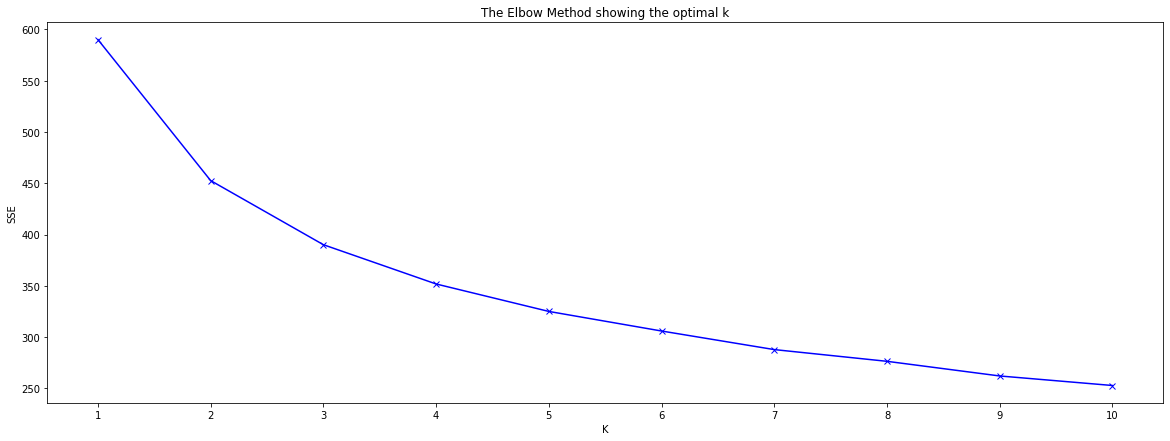

Suggested Optimal K is: 4


In [ ]:
#test kmeans function
CLUSTER_KMEANS = optimal_patients_clusters(CLUSTER)

In [ ]:
CLUSTER_KMEANS['cluster'].value_counts()

0    101
3     90
1     54
2     33
Name: cluster, dtype: int64

In [ ]:
CLUSTER_KMEANS

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp,SBP_Mean,SBP_Max,SBP_Min,SBP_Med,SBP_Std,SBP_Skew,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean,cluster
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0,133.550314,185.0,105.0,132.000000,15.890235,0.893598,40.0,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824,0
83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5,119.272300,152.0,90.0,120.000000,15.577391,0.365037,31.0,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000,0
127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0,130.511111,153.0,110.0,132.666667,12.612672,0.064763,21.5,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667,3
135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5,138.878378,165.0,110.0,139.000000,12.276876,-0.001637,27.5,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667,0
157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0,141.384615,150.0,130.0,140.000000,5.955456,-0.010835,10.0,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0,142.590909,163.0,113.0,147.000000,14.454974,-0.643946,25.0,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909,2
29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0,131.304348,166.0,104.0,131.000000,14.774934,0.498309,31.0,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913,0
30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0,138.340909,157.0,111.0,141.500000,12.610770,-0.983347,23.0,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636,3


## ---------------

# Add Medication

Medication 

1. Accupril ==1
2. Hydropchlorothiazide ==1
3. Norvasc ==1
4. Coumadin ==1
5. Tenormin ==1

In [ ]:
# trim all values in the df
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [ ]:
med = trim_all_columns(med)

In [ ]:
med['MED_NAME'] = med['MED_NAME'].str.upper()
  

In [ ]:
med.head()

,code,MED_NAME,MED_SOURCE,MED_PERIOD_IN_DAYS
0,1166543,BIAXIN,IMOMED,0_100
1,1169007,NOROXIN,IMOMED,0_100
2,1171102,HYDROCHLOROTHIAZIDE,IMOMED,0_100
3,1171102,NORVASC,IMOMED,0_100
4,1171408,NORVASC,IMOMED,0_100


In [ ]:
med_pv= pd.get_dummies(med.MED_NAME, prefix='MED')

med_pv.columns

Index(['MED_ABILIFY', 'MED_ACCUPRIL', 'MED_ACCURETIC', 'MED_ACEBUTOLOL HCL',
       'MED_ACETYLCYSTEINE', 'MED_ACIPHEX', 'MED_ACTONEL', 'MED_ACTOS',
       'MED_ACYCLOVIR', 'MED_ADDERALL',
       ...
       'MED_ZITHROMAX', 'MED_ZITHROMAX Z PAK', 'MED_ZITHROMAX Z-PAK',
       'MED_ZMAX', 'MED_ZOCOR', 'MED_ZOFRAN', 'MED_ZOLOFT', 'MED_ZYBAN',
       'MED_ZYLOPRIM', 'MED_ZYRTEC'],
      dtype='object', length=676)

In [ ]:
med_merged = pd.concat([med, med_pv], axis=1)
med_merged.head()

,code,MED_NAME,MED_SOURCE,MED_PERIOD_IN_DAYS,MED_ABILIFY,MED_ACCUPRIL,MED_ACCURETIC,MED_ACEBUTOLOL HCL,MED_ACETYLCYSTEINE,MED_ACIPHEX,MED_ACTONEL,MED_ACTOS,MED_ACYCLOVIR,MED_ADDERALL,MED_ADDERALL XR,MED_ADVAIR,MED_ADVAIR DISKUS,MED_ADVAIR DISKUS (100/50),MED_ADVAIR DISKUS 100/50,MED_ADVAIR DISKUS 250/50,MED_ADVIL,MED_ADVODART,MED_AEROBID,MED_ALBUTEROL,MED_ALBUTEROL SULFATE,MED_ALDACTONE,MED_ALDARA,MED_ALDOMET,MED_ALEVE,MED_ALLEGRA,MED_ALLEGRA D,MED_ALLEGRA-D 24-HOUR,MED_ALLEGRA-D 12 HOUR,MED_ALLEVE,MED_ALLOPURINOL,MED_ALOPURINOL,MED_ALPHAGAN P,MED_ALPRAZOLAM,MED_ALTACE,MED_AMARYL,MED_AMBIEN,MED_AMBIEN CR,MED_AMITRIPTYLINE,MED_AMITZIA,MED_AMLODIPINE,MED_AMOXICILLIN,MED_AMOXIL,MED_AMPICILLIN,MED_ANAGRELIDE,MED_ANALPRAM HC,MED_ANDRODERM,MED_ANTIVERT,MED_ANUSOL,MED_ANUSOL HC,MED_ANUSOL HC-1,MED_ARICEPT,MED_ARNICA,MED_ARZOL SILVER NITRATE APPLICATORS,MED_ASACOL,MED_ASCRIPTIN,MED_ASPIR-LOW,MED_ASPIR-TRIN,MED_ASPIRIN,MED_ASTELIN,MED_ATACAND,MED_ATACAND - HCT,MED_ATACAND HCT,MED_ATARAX,MED_ATENOLOL,MED_ATIVAN,MED_ATORVASTATIN,MED_ATROVENT,"MED_ATROVENT MDI COMPLETE, 18MCG/ACT (INHALATION AERO SOLN)",MED_ATROVENT NASAL,MED_AUGMENTIN,MED_AUGMENTIN (875),MED_AUGMENTIN 875-MG,MED_AUGMENTIN XR,MED_AVALIDE,MED_AVANDIA,MED_AVAPRO,MED_AVELOX,MED_AVODART,MED_AXID,MED_B FIBER PILLS,"MED_B-D 30 UNIT SYRINGES, 29 ULTRAFINE NEEDLE",MED_BACTRIM,MED_BACTRIM DS,MED_BACTROBAN,MED_BACTROBAN CREAM,MED_BACTROBAN NASAL,MED_BD MINI PEN NEEDLES ULTRAFINE 3,MED_BD PEN NEEDLES,MED_BD ULTRA FINE 3 PEN NEEDLES,MED_BECONASE,MED_BEMINAL 500,MED_BENADRYL,MED_BENEFIBER,MED_BENICAR,MED_BENICAR - HCT,MED_BENICAR HCT,MED_BENICAR-HCT,MED_BENTYL,MED_BETA CAROTENE (PO CAP),MED_BEXTRA,MED_BIAXIN,MED_BIAXIN XL,MED_BIOTENE TOOTHPASTE FOR DRY MOUTH,MED_BONIVA,MED_BYDUREON,MED_BYETTA,MED_BYETTA PEN NEEDLES,MED_BYSTOLIC,MED_CALCIUM 600 + VIT D,MED_CALCIUM 600 WITH VIT D SUPPLEMENT,"MED_CALCIUM ACETATE, 500MG (PO TAB)",MED_CALCUIM + D,MED_CALTRATE 600,MED_CAPE-ALOE,MED_CARDIZEM,MED_CARDIZEM CD,MED_CARDIZEM LA,MED_CARDIZEM SR,MED_CARDURA,MED_CARTIA,MED_CARVEDILOL,MED_CATAPRES TTS 2,MED_CECLOR,MED_CECLOR CD,MED_CEFTIN,MED_CEFUROXIME AXETIL,MED_CEFZIL,MED_CELEBREX,MED_CELEXA,MED_CHANTIX,MED_CHLOR-TRIMETON DECONGESTANT,MED_CHOLESTYRAMINE,MED_CHONDROITIN SULFATE,MED_CIALIS,MED_CIPRO,MED_CITRACAL,MED_CLARINEX,MED_CLARITIN,MED_CLARITIN-D 24 HOUR,MED_CLINDAMYCIN,MED_CLINDAMYCIN HCL,MED_CLOBETASOL,MED_CLONAZEPAM,MED_CLONIDINE,MED_CLONIDINE HCL,MED_CLOPIDOGREL,MED_COBALAMINE COMBINATIONS,MED_COENZYME Q10,MED_COLACE,MED_COLCHICINE,MED_COMBIGAN,MED_COMBIVENT,MED_COMBIVIR,MED_COMPAZINE,MED_COMPRESSION STOCKINGS,MED_COQ 10,MED_COREG,MED_CORTISPORIN,MED_CORTISPORIN TC,MED_COSYNTROPIN TEST,MED_COUMADIN,MED_COVERA-HS,MED_COZAAR,MED_CRESTOR,MED_CYMBALTA,MED_CYTOMEL,MED_CYTOXAN,MED_D-HIST,MED_DALLERGY,MED_DALMANE,MED_DAPSONE,MED_DARVOCET N,MED_DARVOCET N 100,MED_DARVOCET N-100,MED_DARVOCET-N 100,MED_DAYPRO,MED_DE-CONGESTINE TR,MED_DEBROX,MED_DECONAMINE,MED_DECONAMINE SR,MED_DEPAKOTE,MED_DESMOPRESSIN,MED_DETROL LA,MED_DEXAMETHASONE,MED_DEXEDRINE,MED_DHS,MED_DHT,MED_DIABINESE,MED_DICLOFENAC,MED_DICLOFENAC EC,MED_DICLOXAXILLIN,MED_DIDRONEL,MED_DIFLUCAN,MED_DILACOR XR,MED_DILANTIN,MED_DILAUDID,MED_DILTIAZEM,MED_DILTIAZEM CD,MED_DILTIAZEM HCL CR,MED_DIOVAN,MED_DIOVAN HCT,MED_DIPHTHERIA/TETANUS TOXOIDS,MED_DITROPAN,MED_DITROPAN XL,MED_DIURIL,MED_DONNATAL EXTENTABS,MED_DOXYCYCLINE,MED_DOXYCYCLINE HYCLATE,"MED_DOXYCYCLINE HYCLATE CR, 100MG (PO CAP)",MED_DOXYCYCLINE HYCLATE EC,MED_DOXYCYCLINE MONOHYDRATE,MED_DULCOLAX,MED_DULCOLAX EXTENTABS,MED_DUONEB,MED_DURAGESIC,MED_DYAZIDE,MED_DYAZIDE (37.5/25),MED_DYNACIRC,MED_DYNACIRC CR,MED_E MYCIN,MED_E-MYCIN,MED_ECOTRIN,MED_ECOTRIN LOW STRENGTH,MED_ECOTRIN LOW STRENGTH ADULT,MED_EFFEXOR XR,MED_ELAVIL,MED_ELIQUIS,MED_ENABLEX,MED_ENALAPRIL,MED_ENTEX LA,MED_ENTOCORT,MED_ERYTHROMYCIN,MED_ESGIC,MED_ESGIC PLUS,MED_ESTINYL,MED_ESTRACE,MED_FACTIVE,MED_FAMCICLOVIR,MED_FAMVIR,MED_FEMARA,MED_FERROUS SULFATE,MED_FEXOFENADINE,MED_FIORICET,MED_FIORICET WITH CODEINE,MED_FISH OIL

In [ ]:
#Top 5 Medication
MED_NAME_5 = ['code','MED_ACCUPRIL', 
'MED_HYDROCHLOROTHIAZIDE',
'MED_NORVASC',
'MED_COUMADIN',
'MED_TENORMIN']

In [ ]:
#new medication df only has the selected medication dummues and visit code
med_merged = med_merged[MED_NAME_5]
med_merged.head()

,code,MED_ACCUPRIL,MED_HYDROCHLOROTHIAZIDE,MED_NORVASC,MED_COUMADIN,MED_TENORMIN
0,1166543,0,0,0,0,0
1,1169007,0,0,0,0,0
2,1171102,0,1,0,0,0
3,1171102,0,0,1,0,0
4,1171408,0,0,1,0,0


In [ ]:
#HS['First Age'] = dta.groupby('PATIENT_NUM')['AGE'].min().astype('int')

In [ ]:
dta.head()

,index,PATIENT_NUM,ADMIT_DATE,DISCH_DATE,GENDER,VISIT_TYPE,AGE,FAMILY_HYPERTENSION_NUM,HYPERTENSION_VISIT,HYPERTENSION_SEVERITY,HYPERTENSION_STATUS,DIASTOLIC_BP,SYSTOLIC_BP,WEIGHT,HEIGHT,TEMPERATURE,PULSE,PULSE_DESCRIPTION,BP_CUFF_SIZE,RESPIRATION,RESPIRATION_DESCRIPTION,PULSEOXYGEN,PULSEOXYGEN_DESCRIPTION,BMI,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,HOS_PERIOD
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1166192,0,1166159,1996-03-18,1996-03-18,1,6.0,75.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1166525,1,1166159,1996-03-19,1996-03-19,1,98.0,75.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1166543,2,1166159,1996-03-25,1996-03-25,1,6.0,75.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1167065,3,1166159,1996-03-18,1996-03-18,1,96.0,75.0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
1167480,4,1166159,1996-03-25,1996-03-25,1,96.0,75.0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0


In [ ]:
dta_addMED = pd.merge(dta, med_merged, on='code', how='left').set_index('code')
dta_addMED = dta_addMED.fillna(0)


In [ ]:
CLUSTER['MED_ACCUPRIL'] = dta_addMED.groupby('PATIENT_NUM')['MED_ACCUPRIL'].sum().astype('int')
CLUSTER['MED_HYDROCHLOROTHIAZIDE'] = dta_addMED.groupby('PATIENT_NUM')['MED_HYDROCHLOROTHIAZIDE'].sum().astype('int')
CLUSTER['MED_NORVASC'] = dta_addMED.groupby('PATIENT_NUM')['MED_NORVASC'].sum().astype('int')
CLUSTER['MED_COUMADIN'] = dta_addMED.groupby('PATIENT_NUM')['MED_COUMADIN'].sum().astype('int')
CLUSTER['MED_TENORMIN'] = dta_addMED.groupby('PATIENT_NUM')['MED_TENORMIN'].sum().astype('int')


In [ ]:
#just to check if the column value make sense
#dta_addMED['MED_ACCUPRIL'][dta_addMED['PATIENT_NUM']==1091]


In [ ]:
#dta_addMED.groupby('PATIENT_NUM')['MED_ACCUPRIL'].sum().astype('int').sort_values(ascending=False)

# Add Allergy 

Allergy upper case all values

1. Lipitor ==1
2. Penicillin ==1
3. Sulfa ==1
4. Accupril ==1
5. Hytrin ==1

In [ ]:
allergy= trim_all_columns(allergy)
allergy.head()

,code,ALLERGY_DESCRIPTION
0,1167065,Codeine
1,1170680,Plendl
2,1170979,Sular
3,1172314,Toprol XL
4,1172314,Toprol XL


In [ ]:
allergy['ALLERGY_DESCRIPTION'] = allergy['ALLERGY_DESCRIPTION'].str.upper()


In [ ]:
algy_pv= pd.get_dummies(allergy.ALLERGY_DESCRIPTION, prefix='ALGY')

algy_pv.columns

Index(['ALGY_&QUOT;WINE&QUOT;', 'ALGY_? HEXACYCLINE', 'ALGY_A.C.E. INHIBITORS',
       'ALGY_ABILIFY', 'ALGY_ACCIDENT', 'ALGY_ACCUPRIL', 'ALGY_ACCURETIC',
       'ALGY_ACE INHIBITORS', 'ALGY_ACE-INHIBITORS', 'ALGY_ACIPHEX',
       ...
       'ALGY_ZANTAC', 'ALGY_ZESTORETIC', 'ALGY_ZESTRIL', 'ALGY_ZETIA',
       'ALGY_ZINCAP', 'ALGY_ZITHROMAX', 'ALGY_ZOCOR', 'ALGY_ZOLOFT',
       'ALGY_ZYPREXA', 'ALGY_ZYRTEC'],
      dtype='object', length=425)

In [ ]:
algy_merged = pd.concat([allergy, algy_pv], axis=1)
algy_merged.head()

,code,ALLERGY_DESCRIPTION,ALGY_&QUOT;WINE&QUOT;,ALGY_? HEXACYCLINE,ALGY_A.C.E. INHIBITORS,ALGY_ABILIFY,ALGY_ACCIDENT,ALGY_ACCUPRIL,ALGY_ACCURETIC,ALGY_ACE INHIBITORS,ALGY_ACE-INHIBITORS,ALGY_ACIPHEX,ALGY_ACTONEL,ALGY_ACTOS,ALGY_ADHESIVE BANDAGES,ALGY_ADHESIVE TAPE,ALGY_ADVAIR DISKUS,ALGY_ADVICOR,ALGY_ADVIL,ALGY_ALDACTONE,ALGY_ALDOMET,ALGY_ALEVE,ALGY_ALIMTA,ALGY_ALLEGRA,ALGY_ALLEGRA D,ALGY_ALLOPURINOL,ALGY_ALPHAGAN,ALGY_ALTACE,ALGY_ALUMINUM,ALGY_AMBIEN,ALGY_AMBIEN CR,ALGY_AMIODARONE,ALGY_AMITRIPTYLINE,ALGY_AMITZIA,ALGY_AMLODIPINE,ALGY_AMOXICILLIN,ALGY_AMPICILLIN,ALGY_ANGIOTENSIN CONVERTING ENZYME INHIBITORS,ALGY_ANIMALS,ALGY_ANTIHYPERTENSIVES,ALGY_APPLES,ALGY_ARICEPT,ALGY_ARTICAINE,ALGY_ASA,ALGY_ASPIRIN,ALGY_ATACAND,ALGY_ATARAX,ALGY_ATENOLOL,ALGY_ATIVAN AND TYLENOL CODIENE TOGETHER,ALGY_ATORVASTATIN,ALGY_AUGMENTIN,ALGY_AVALIDE,ALGY_AVANDIA,ALGY_AVAPRO,ALGY_AVELOX,ALGY_AVODART,ALGY_AXID,ALGY_BACITRACIN,ALGY_BACLOFEN,ALGY_BACTRIM,ALGY_BAYCOL,ALGY_BELSOMRA,ALGY_BENADRYL,"ALGY_BENADRYL, LEVISCON, IRON, TYLENOL #3",ALGY_BENICAR,ALGY_BENTYL,ALGY_BETA BLOCKERS,ALGY_BETA-BLOCKER,ALGY_BETADINE,ALGY_BEXTRA,ALGY_BIAXIN,ALGY_BONIVA,ALGY_BUDESONIDE,ALGY_BYDUREON,ALGY_BYETTA,ALGY_BYSTOLIC,ALGY_CALCIUM CHANNEL BLOCKING AGENTS,ALGY_CANDESARTAN,ALGY_CANNOT TAKE BIG PILLS,ALGY_CARBA MIX,ALGY_CARBAMAZEPINE,ALGY_CARDIZEM,ALGY_CARDIZEM CD,ALGY_CARDIZEM LA,ALGY_CARDURA,ALGY_CARVEDILOL,ALGY_CAT,ALGY_CAT GUT SUTURES,ALGY_CATS,ALGY_CECLOR,ALGY_CEFTIN,ALGY_CELEBREX,ALGY_CELEXA,ALGY_CEPHALOSPORINS,ALGY_CHANGES IN CLIMATE AND FOOD,ALGY_CHANTIX,ALGY_CHEER DETERGENT,ALGY_CHOLESTYRAMINE,ALGY_CIALIS,ALGY_CIPRO,ALGY_CITALOPRAM,ALGY_CLASSES OF DRUGS,ALGY_CLEOCIN,ALGY_CLINDAMYCIN,ALGY_CLINDAMYCIN HYDROCHLORIDE,ALGY_CLONAZEPAM,ALGY_CLONIDINE,ALGY_COBALT DICHLORIDE,ALGY_CODEINE,ALGY_CODEINE SULFATE,ALGY_CODIENE,ALGY_COLACE,ALGY_COMBIVENT,ALGY_COMPAZINE,ALGY_CONTRAST DYE,ALGY_CONTRAST MEDIA,ALGY_COREG,ALGY_COUMADIN,ALGY_COVERA-HS,ALGY_COZAAR,ALGY_CRESTOR,ALGY_CYMBALTA,ALGY_DALLERGY,ALGY_DANDER,ALGY_DARVON,ALGY_DAYPRO,ALGY_DEMEROL,ALGY_DESMOPRESSIN,ALGY_DETROL,ALGY_DICLOXACILLIN,ALGY_DIGITALIS,ALGY_DILAUDID,ALGY_DILTIAZEM,ALGY_DIOVAN,ALGY_DITROPAN,ALGY_DITROPAN XL,ALGY_DIURETICS,ALGY_DOGS,ALGY_DORZOLAMIDE,ALGY_DOXEPIN,ALGY_DOXYCYCLINE,ALGY_DOXYCYCLINE HYCLATE,ALGY_DUST,ALGY_DYAZIDE,ALGY_DYMISTA,ALGY_DYNACIRC CR,ALGY_EFFEXOR,ALGY_EFFEXOR XR,ALGY_EGGS,ALGY_ELAVIL,ALGY_ENSURE,ALGY_ENTAX,ALGY_ENTEX LA,ALGY_ERRONEOUS ENTRY,ALGY_ERYTHROMICIN,ALGY_ERYTHROMYCIN,ALGY_ERYTHROMYCIN BASE,ALGY_ESGIC,ALGY_EVISTA,ALGY_EXELON,ALGY_EYE DROPS,ALGY_FELDENE,ALGY_FENTANYL,ALGY_FENTANYL CITRATE,ALGY_FISH,ALGY_FISH OIL,ALGY_FLAGYL,ALGY_FLEXERIL,ALGY_FLOMAX,ALGY_FLOUROSCEIN DYE,ALGY_FLOXIN,ALGY_FLU SHOT,ALGY_FORMALDAHYDE,ALGY_FORTEO,ALGY_FOSAMAX,ALGY_FRAGRANCES IN SOAPS/SHAMPOOS,ALGY_FRESH PARSEY,ALGY_FURADANTIN,ALGY_GEMFIBROZIL,ALGY_GLUCOPHAGE,ALGY_GLUCOPHAGE -SR,ALGY_GLUCOSAMINE,ALGY_GRASS,ALGY_HARVONI ( HEP C MED),ALGY_HAY FEVER,ALGY_HAYFEVER,ALGY_HEMOPHILUS VACCINE,ALGY_HORSES,ALGY_HOUSEDUST,ALGY_HUMIBID,ALGY_HYCODAN,ALGY_HYDRALAZINE,ALGY_HYDROCHLOROTHIAZIDE,ALGY_HYDROCHLORTHIAZIDE,ALGY_HYDROCODONE,ALGY_HYDROCORTISONE,ALGY_HYTRIN,ALGY_IBUPROFEN,ALGY_ILOSONE,ALGY_INDOCIN,ALGY_IODINE,ALGY_ISORDIL,ALGY_ISTALOL,ALGY_IVP DYE,ALGY_JALYN,ALGY_JANUVIA,ALGY_KAYEXALATE,ALGY_KEFLEX,ALGY_LABETALOL,ALGY_LAMISIL,ALGY_LASIX,ALGY_LATEX,ALGY_LESCOL,ALGY_LEVAQUIN,ALGY_LEVBID,ALGY_LEVITRA,"ALGY_LEVOQUINE, INDOCIN: POSSIBLE STOMATITIS",ALGY_LEVSIN,ALGY_LEXAPRO,ALGY_LIDOCAINE,ALGY_LIPITOR,ALGY_LISINOPRIL,ALGY_LIVALO,ALGY_LORABID,ALGY_LORAZEPAM,ALGY_LOTREL,ALGY_LOTREL (XXXX),ALGY_LOTREL 5/10 MG,ALGY_LUMIGAN,ALGY_LUNESTA,ALGY_LYRICA,ALGY_MACROBID,ALGY_MACRODANTIN,ALGY_MEDROL,ALGY_MEGACE,ALGY_MELOXICAM,ALGY_METAMUCIL,ALGY_METFORMIN,ALGY_METHADONE,ALGY_METHADONE HYDROCHLORIDE,ALGY_METHOTREXATE,ALGY_METOCLOPRAMIDE,ALGY_METOPROLOL,ALGY_MEVACOR,ALGY_MIACALCIN,ALGY_MICRO K 10,ALGY_MIRTAZAPINE,ALGY_MOBIC,ALGY_MOLD,ALGY_MOLD OR DUST,ALGY_MOLDS SPORES,ALGY_MORPHINE,ALGY_MOTRIN,ALGY_MUCINEX,ALGY_MYCOSTATIN,ALGY_NAMEND

In [ ]:
algy_col_5 = ['code','ALGY_LIPITOR','ALGY_PENICILLIN','ALGY_SULFA','ALGY_ACCUPRIL','ALGY_HYTRIN']

In [ ]:
algy_merged = algy_merged[algy_col_5]
algy_merged.head()

,code,ALGY_LIPITOR,ALGY_PENICILLIN,ALGY_SULFA,ALGY_ACCUPRIL,ALGY_HYTRIN
0,1167065,0,0,0,0,0
1,1170680,0,0,0,0,0
2,1170979,0,0,0,0,0
3,1172314,0,0,0,0,0
4,1172314,0,0,0,0,0


In [ ]:
dta_addALGY = pd.merge(dta, algy_merged, on='code', how='left').set_index('code')
dta_addALGY = dta_addALGY.fillna(0)


In [ ]:
CLUSTER['ALGY_LIPITOR'] = dta_addALGY.groupby('PATIENT_NUM')['ALGY_LIPITOR'].sum().astype('int')
CLUSTER['ALGY_PENICILLIN'] = dta_addALGY.groupby('PATIENT_NUM')['ALGY_PENICILLIN'].sum().astype('int')
CLUSTER['ALGY_SULFA'] = dta_addALGY.groupby('PATIENT_NUM')['ALGY_SULFA'].sum().astype('int')
CLUSTER['ALGY_ACCUPRIL'] = dta_addALGY.groupby('PATIENT_NUM')['ALGY_ACCUPRIL'].sum().astype('int')
CLUSTER['ALGY_HYTRIN'] = dta_addALGY.groupby('PATIENT_NUM')['ALGY_HYTRIN'].sum().astype('int')


In [ ]:
CLUSTER.sum()

Unknown %                   5400.000000
Red %                       4089.406033
Yellow %                   17676.152125
Green %                      634.441842
Total_Number_of_Visits     57439.000000
Hypertension_Visits %       4632.880439
HST Unknown %               5300.000000
HST Red %                   2875.131851
HST Yellow %                8507.002527
HST Green %                11117.865623
Years                       4920.000000
GENDER                       415.000000
AGE                        16815.000000
FAMILY_HYPERTENSION_NUM      118.000000
NON_SMOKER                   166.000000
NON_DRINKER                   62.000000
REGULAR_EXERCISER             55.000000
NON_ALLERGY                   40.000000
DBP_Mean                   21078.521822
DBP_Max                    26771.833333
DBP_Min                    15998.333333
DBP_Med                    21065.666667
DBP_Std                     2374.008505
DBP_Skew                      -5.171256
DBP_Amp                     5386.750000


# Patient level dataset and modelling

In [ ]:
CLUSTER['Hypertension_Visits %'].mean()

16.665037550372293

In [ ]:
CLUSTER['Red %'].mean()

14.710093644385312

In [ ]:
CLUSTER['Yellow %'].mean()

63.583281026094994

In [ ]:
CLUSTER['Green %'].mean()

2.2821648978650177

In [ ]:
CLUSTER['Unknown %'].mean()

19.424460431654676

In [ ]:
CLUSTER.columns

Index(['Unknown %', 'Red %', 'Yellow %', 'Green %', 'Total_Number_of_Visits',
       'Hypertension_Visits %', 'HST Unknown %', 'HST Red %', 'HST Yellow %',
       'HST Green %', 'Years', 'GENDER', 'AGE', 'FAMILY_HYPERTENSION_NUM',
       'NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY',
       'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med', 'DBP_Std', 'DBP_Skew',
       'DBP_Amp', 'SBP_Mean', 'SBP_Max', 'SBP_Min', 'SBP_Med', 'SBP_Std',
       'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean', 'WEIGHT_Max', 'WEIGHT_Min',
       'WEIGHT_Med', 'WEIGHT_Std', 'WEIGHT_Skew', 'WEIGHT_Amp', 'TEMP_Mean',
       'PULSE_Mean', 'MED_ACCUPRIL', 'MED_HYDROCHLOROTHIAZIDE', 'MED_NORVASC',
       'MED_COUMADIN', 'MED_TENORMIN', 'ALGY_LIPITOR', 'ALGY_PENICILLIN',
       'ALGY_SULFA', 'ALGY_ACCUPRIL', 'ALGY_HYTRIN'],
      dtype='object')

In [ ]:
CLUSTER.isnull().sum()

Unknown %                  0
Red %                      0
Yellow %                   0
Green %                    0
Total_Number_of_Visits     0
Hypertension_Visits %      0
HST Unknown %              0
HST Red %                  0
HST Yellow %               0
HST Green %                0
Years                      0
GENDER                     0
AGE                        0
FAMILY_HYPERTENSION_NUM    0
NON_SMOKER                 0
NON_DRINKER                0
REGULAR_EXERCISER          0
NON_ALLERGY                0
DBP_Mean                   0
DBP_Max                    0
DBP_Min                    0
DBP_Med                    0
DBP_Std                    0
DBP_Skew                   0
DBP_Amp                    0
SBP_Mean                   0
SBP_Max                    0
SBP_Min                    0
SBP_Med                    0
SBP_Std                    0
SBP_Skew                   0
SBP_Amp                    0
WEIGHT_Mean                0
WEIGHT_Max                 0
WEIGHT_Min    

In [ ]:
CLUSTER

,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp,SBP_Mean,SBP_Max,SBP_Min,SBP_Med,SBP_Std,SBP_Skew,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean,MED_ACCUPRIL,MED_HYDROCHLOROTHIAZIDE,MED_NORVASC,MED_COUMADIN,MED_TENORMIN,ALGY_LIPITOR,ALGY_PENICILLIN,ALGY_SULFA,ALGY_ACCUPRIL,ALGY_HYTRIN
PATIENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0,133.550314,185.0,105.0,132.000000,15.890235,0.893598,40.0,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824,0,0,0,0,0,0,1,1,0,0
83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5,119.272300,152.0,90.0,120.000000,15.577391,0.365037,31.0,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000,0,0,0,0,0,1,0,1,0,0
127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0,130.511111,153.0,110.0,132.666667,12.612672,0.064763,21.5,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667,0,0,0,0,0,0,0,0,0,0
135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5,138.878378,165.0,110.0,139.000000,12.276876,-0.001637,27.5,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667,0,0,0,0,0,0,2,2,0,0
157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0,141.384615,150.0,130.0,140.000000,5.955456,-0.010835,10.0,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0,142.590909,163.0,113.0,147.000000,14.454974,-0.643946,25.0,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909,0,0,0,0,0,0,0,0,0,0
29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0,131.304348,166.0,104.0,131.000000,14.774934,0.498309,31.0,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913,0,0,0,0,0,0,1,1,0,0
30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0,138.340909,157.0,111.0,141.500000,12.610770,-0.983347,23.0,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636,0,0,0,0,0,1,0,0,0,0


In [ ]:
# There is a patient with 0 hypertension visit PATIENT 5043536
CLUSTER['Hypertension_Visits %'] = CLUSTER['Hypertension_Visits %'].fillna(0)

In [ ]:
dta_demo = pd.read_csv('/drive/MyDrive/MSCA_Capstone_Project/Data/Patient_Data/dta_label_prediction_severity.csv')

In [ ]:
dta_demo.columns

Index(['PATIENT_NUM', 'code', 'GENDER', 'VISIT_TYPE', 'AGE',
       'FAMILY_HYPERTENSION_NUM', 'HYPERTENSION_VISIT',
       'HYPERTENSION_SEVERITY', 'HYPERTENSION_STATUS', 'DIASTOLIC_BP',
       'SYSTOLIC_BP', 'WEIGHT', 'HEIGHT', 'TEMPERATURE', 'PULSE',
       'RESPIRATION', 'PULSEOXYGEN', 'NON_SMOKER', 'NON_DRINKER',
       'REGULAR_EXERCISER', 'NON_ALLERGY', 'HOS_PERIOD', 'cluster', 'VISIT',
       'DAYS', 'LABELED'],
      dtype='object')

## Label Prediction for 'HYPERTENSION STATUS'

In [ ]:
X_label = np.array(dta_demo[dta_demo['HYPERTENSION_STATUS'] != 0].iloc[:, 2:].drop(['HYPERTENSION_STATUS', 'LABELED'], axis = 1))

In [ ]:
X_test_label = np.array(dta_demo[dta_demo['HYPERTENSION_STATUS'] == 0].iloc[:, 2:].drop(['HYPERTENSION_STATUS', 'LABELED'], axis = 1))

In [ ]:
y_label = np.array(dta_demo[dta_demo['HYPERTENSION_STATUS'] != 0]['HYPERTENSION_STATUS'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state = 830)

In [ ]:
rf_classifier.fit(X_label, y_label)

RandomForestClassifier(random_state=830)

In [ ]:
rf_classifier.score(X_label, y_label)

1.0

In [ ]:
y_pred_rf_label = rf_classifier.predict(X_test_label)

In [ ]:
dta_demo.loc[dta_demo['HYPERTENSION_STATUS'] == 0, 'HYPERTENSION_STATUS'] = y_pred_rf_label

In [ ]:
dta_demo['HYPERTENSION_STATUS'].value_counts()

3    31672
2    21285
1     4760
Name: HYPERTENSION_STATUS, dtype: int64

## Label SEVERITY TREND

In [ ]:
last_severity = dta_demo.groupby('PATIENT_NUM', as_index=False).nth(-1)[['PATIENT_NUM',
                                                                                    'HYPERTENSION_SEVERITY']]
last_status = dta_demo.groupby('PATIENT_NUM', as_index=False).nth(-1)[['PATIENT_NUM',
                                                                                    'HYPERTENSION_STATUS']]

last_severity = last_severity.rename(columns={'HYPERTENSION_SEVERITY': 'LAST_SEVERITY'})
last_status = last_status.rename(columns={'HYPERTENSION_STATUS': 'LAST_STATUS'})  

In [ ]:
CLUSTER = CLUSTER.merge(last_status, how='left', on='PATIENT_NUM')
CLUSTER = CLUSTER.merge(last_severity, how='left', on='PATIENT_NUM')

In [ ]:
conditions = [CLUSTER['LAST_SEVERITY'] - CLUSTER['LAST_STATUS'] > 0,
              CLUSTER['LAST_SEVERITY'] - CLUSTER['LAST_STATUS'] == 0,
              CLUSTER['LAST_SEVERITY'] - CLUSTER['LAST_STATUS'] < 0]
categories = ["increase", 'same', 'decrease']
CLUSTER["SEVERITY_TREND"] = np.select(conditions, categories)

In [ ]:
CLUSTER["SEVERITY_TREND"].value_counts()

decrease    218
same         55
increase      5
Name: SEVERITY_TREND, dtype: int64

In [ ]:
CLUSTER

,PATIENT_NUM,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp,SBP_Mean,SBP_Max,SBP_Min,SBP_Med,SBP_Std,SBP_Skew,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean,MED_ACCUPRIL,MED_HYDROCHLOROTHIAZIDE,MED_NORVASC,MED_COUMADIN,MED_TENORMIN,ALGY_LIPITOR,ALGY_PENICILLIN,ALGY_SULFA,ALGY_ACCUPRIL,ALGY_HYTRIN,LAST_STATUS,LAST_SEVERITY,SEVERITY_TREND
0,1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0,133.550314,185.0,105.0,132.000000,15.890235,0.893598,40.0,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824,0,0,0,0,0,0,1,1,0,0,3,2,decrease
1,83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5,119.272300,152.0,90.0,120.000000,15.577391,0.365037,31.0,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000,0,0,0,0,0,1,0,1,0,0,3,2,decrease
2,127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0,130.511111,153.0,110.0,132.666667,12.612672,0.064763,21.5,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667,0,0,0,0,0,0,0,0,0,0,3,3,same
3,135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5,138.878378,165.0,110.0,139.000000,12.276876,-0.001637,27.5,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667,0,0,0,0,0,0,2,2,0,0,3,2,decrease
4,157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0,141.384615,150.0,130.0,140.000000,5.955456,-0.010835,10.0,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273,0,0,0,0,0,0,0,0,0,0,2,2,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0,142.590909,163.0,113.0,147.000000,14.454974,-0.643946,25.0,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909,0,0,0,0,0,0,0,0,0,0,3,1,decrease
274,29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0,131.304348,166.0,104.0,131.000000,14.774934,0.498309,31.0,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913,0,0,0,0,0,0,1,1,0,0,2,2,same
275,30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0,138.340909,157.0,111.0,141.500000,12.610770,-0.983347,23.0,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636,0,0,0,0,0,1,0,0,0,0,3,2,decrease
276,31151244,0.0,0.000000,100.000000,0.000000,4,25.000000,0.0,0.000000,0.000000,100.000000,0,2,60,0,0,0,0,1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,3,2,decrease


In [ ]:
CLUSTER['SEVERITY_TREND'] = CLUSTER['SEVERITY_TREND'].replace({'decrease': 1, 'same': 2, 'increase':3})

In [ ]:
CLUSTER

,PATIENT_NUM,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp,SBP_Mean,SBP_Max,SBP_Min,SBP_Med,SBP_Std,SBP_Skew,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean,MED_ACCUPRIL,MED_HYDROCHLOROTHIAZIDE,MED_NORVASC,MED_COUMADIN,MED_TENORMIN,ALGY_LIPITOR,ALGY_PENICILLIN,ALGY_SULFA,ALGY_ACCUPRIL,ALGY_HYTRIN,LAST_STATUS,LAST_SEVERITY,SEVERITY_TREND
0,1091,0.0,0.000000,100.000000,0.000000,123,31.707317,0.0,0.000000,21.951220,78.048780,9,1,80,0,0,0,0,0,65.172956,82.0,48.0,64.0,7.090532,0.142367,17.0,133.550314,185.0,105.0,132.000000,15.890235,0.893598,40.0,168.416667,171.0,158.0,169.00,3.248931,-2.657335,6.50,97.740000,67.691824,0,0,0,0,0,0,1,1,0,0,3,2,1
1,83369,0.0,0.000000,100.000000,0.000000,309,7.119741,0.0,0.000000,0.000000,100.000000,19,1,65,0,1,0,0,0,68.859155,92.0,49.0,69.0,9.834254,0.267173,21.5,119.272300,152.0,90.0,120.000000,15.577391,0.365037,31.0,135.650000,154.0,118.6,132.00,10.356375,0.705737,17.70,98.560000,89.750000,0,0,0,0,0,1,0,1,0,0,3,2,1
2,127948,0.0,0.000000,91.346154,8.653846,104,21.153846,0.0,0.000000,35.576923,64.423077,24,2,50,1,0,0,1,0,74.733333,80.0,64.0,77.0,5.323881,-0.597719,8.0,130.511111,153.0,110.0,132.666667,12.612672,0.064763,21.5,183.722222,197.0,163.0,184.75,9.903080,-0.655942,17.00,86.933333,58.666667,0,0,0,0,0,0,0,0,0,0,3,3,2
3,135797,0.0,0.000000,100.000000,0.000000,188,19.680851,0.0,0.000000,69.680851,30.319149,20,1,50,0,1,0,0,0,75.702703,90.0,61.0,75.0,7.790725,0.145458,14.5,138.878378,165.0,110.0,139.000000,12.276876,-0.001637,27.5,218.122727,227.0,194.0,223.50,9.764171,-1.320585,16.50,98.517647,86.166667,0,0,0,0,0,0,2,2,0,0,3,2,1
4,157037,0.0,0.000000,100.000000,0.000000,97,4.123711,0.0,0.000000,100.000000,0.000000,19,2,40,0,1,1,1,0,84.461538,96.0,72.0,85.0,6.428487,-0.064610,12.0,141.384615,150.0,130.0,140.000000,5.955456,-0.010835,10.0,185.818182,192.0,182.0,185.00,4.018552,0.418803,5.00,99.050000,95.727273,0,0,0,0,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,28305113,0.0,100.000000,0.000000,0.000000,59,27.118644,0.0,0.000000,77.966102,22.033898,5,2,50,2,0,0,0,0,78.681818,91.0,63.0,79.0,7.628513,-0.630156,14.0,142.590909,163.0,113.0,147.000000,14.454974,-0.643946,25.0,190.500000,200.5,178.0,191.00,8.972179,-0.334960,11.25,0.000000,75.090909,0,0,0,0,0,0,0,0,0,0,3,1,1
274,29154764,0.0,59.090909,40.909091,0.000000,88,29.545455,0.0,5.681818,15.909091,78.409091,2,1,90,0,1,0,0,0,79.869565,92.0,70.0,80.0,6.312888,0.114358,11.0,131.304348,166.0,104.0,131.000000,14.774934,0.498309,31.0,153.600000,162.0,146.0,149.00,6.945502,0.329359,8.00,98.300000,82.173913,0,0,0,0,0,0,1,1,0,0,2,2,2
275,30048752,0.0,0.000000,100.000000,0.000000,71,23.943662,0.0,0.000000,9.859155,90.140845,3,2,85,0,0,0,0,0,70.977273,81.0,51.0,72.5,7.333729,-1.044384,15.0,138.340909,157.0,111.0,141.500000,12.610770,-0.983347,23.0,188.625000,192.5,183.0,189.50,3.542157,-0.636788,4.75,98.125000,64.863636,0,0,0,0,0,1,0,0,0,0,3,2,1
276,31151244,0.0,0.000000,100.000000,0.000000,4,25.000000,0.0,0.000000,0.000000,100.000000,0,2,60,0,0,0,0,1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,3,2,1


In [ ]:
CLUSTER.columns

Index(['PATIENT_NUM', 'Unknown %', 'Red %', 'Yellow %', 'Green %',
       'Total_Number_of_Visits', 'Hypertension_Visits %', 'HST Unknown %',
       'HST Red %', 'HST Yellow %', 'HST Green %', 'Years', 'GENDER', 'AGE',
       'FAMILY_HYPERTENSION_NUM', 'NON_SMOKER', 'NON_DRINKER',
       'REGULAR_EXERCISER', 'NON_ALLERGY', 'DBP_Mean', 'DBP_Max', 'DBP_Min',
       'DBP_Med', 'DBP_Std', 'DBP_Skew', 'DBP_Amp', 'SBP_Mean', 'SBP_Max',
       'SBP_Min', 'SBP_Med', 'SBP_Std', 'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean',
       'WEIGHT_Max', 'WEIGHT_Min', 'WEIGHT_Med', 'WEIGHT_Std', 'WEIGHT_Skew',
       'WEIGHT_Amp', 'TEMP_Mean', 'PULSE_Mean', 'MED_ACCUPRIL',
       'MED_HYDROCHLOROTHIAZIDE', 'MED_NORVASC', 'MED_COUMADIN',
       'MED_TENORMIN', 'ALGY_LIPITOR', 'ALGY_PENICILLIN', 'ALGY_SULFA',
       'ALGY_ACCUPRIL', 'ALGY_HYTRIN', 'LAST_STATUS', 'LAST_SEVERITY',
       'SEVERITY_TREND'],
      dtype='object')

In [ ]:
StatSum = pd.DataFrame(CLUSTER.describe())

In [ ]:
pd.set_option('display.max_columns', 500)
StatSum

,PATIENT_NUM,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,MED_ACCUPRIL,MED_HYDROCHLOROTHIAZIDE,MED_NORVASC,MED_COUMADIN,MED_TENORMIN,ALGY_LIPITOR,ALGY_PENICILLIN,ALGY_SULFA,ALGY_ACCUPRIL,ALGY_HYTRIN,LAST_STATUS,LAST_SEVERITY,SEVERITY_TREND
count,2.780000e+02,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.00000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,6.337048e+06,19.424460,14.710094,63.583281,2.282165,206.615108,16.665038,19.064748,10.342201,30.600729,39.992322,17.697842,1.492806,60.485612,0.424460,0.597122,0.223022,0.197842,0.143885,0.334532,0.298561,0.255396,0.359712,0.223022,0.172662,0.26259,0.183453,0.075540,0.057554,2.776978,1.859712,1.233813
std,7.152260e+06,39.633151,29.958561,43.086012,9.166892,109.984013,10.945684,39.352009,23.834332,29.281119,31.315452,4.512565,0.500850,13.563521,0.942218,0.491361,0.417023,0.399091,0.351606,1.123893,1.205013,0.988867,2.628660,1.240375,0.635054,0.75961,0.611691,0.395889,0.365868,0.510442,0.515215,0.464642
min,1.091000e+03,0.000000,0.000000,0.000000,0.000000,4.000000,0.458716,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.300007e+06,0.000000,0.000000,0.310559,0.000000,126.250000,6.241762,0.000000,0.000000,0.000000,13.954936,16.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000
50%,4.576569e+06,0.000000,0.000000,91.372002,0.000000,190.500000,16.665038,0.000000,0.000000,22.113051,36.947506,19.000000,1.000000,60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000
75%,5.890855e+06,0.000000,8.658802,100.000000,0.000000,258.500000,25.000000,0.000000,4.390443,58.192086,63.598901,21.000000,2.000000,70.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000
max,3.210924e+07,100.000000,100.000000,100.000000,75.641026,784.000000,49.350649,100.000000,100.000000,100.000000,100.000000,24.000000,2.000000,90.000000,8.000000,1.000000,1.000000,1.000000,1.000000,8.000000,12.000000,7.000000,39.000000,14.000000,5.000000,5.00000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000


In [ ]:
StatSum.to_csv(r'/drive/MyDrive/MSCA_Capstone_Project/Data/StatisticsSummary.csv', index=False)

## Correlation Table

In [ ]:
corr_fact2 = CLUSTER.corr()
corr_fact2.style.background_gradient(cmap='coolwarm')

,PATIENT_NUM,Unknown %,Red %,Yellow %,Green %,Total_Number_of_Visits,Hypertension_Visits %,HST Unknown %,HST Red %,HST Yellow %,HST Green %,Years,GENDER,AGE,FAMILY_HYPERTENSION_NUM,NON_SMOKER,NON_DRINKER,REGULAR_EXERCISER,NON_ALLERGY,DBP_Mean,DBP_Max,DBP_Min,DBP_Med,DBP_Std,DBP_Skew,DBP_Amp,SBP_Mean,SBP_Max,SBP_Min,SBP_Med,SBP_Std,SBP_Skew,SBP_Amp,WEIGHT_Mean,WEIGHT_Max,WEIGHT_Min,WEIGHT_Med,WEIGHT_Std,WEIGHT_Skew,WEIGHT_Amp,TEMP_Mean,PULSE_Mean,MED_ACCUPRIL,MED_HYDROCHLOROTHIAZIDE,MED_NORVASC,MED_COUMADIN,MED_TENORMIN,ALGY_LIPITOR,ALGY_PENICILLIN,ALGY_SULFA,ALGY_ACCUPRIL,ALGY_HYTRIN,LAST_STATUS,LAST_SEVERITY,SEVERITY_TREND
PATIENT_NUM,1.000000,-0.186223,0.168560,0.053361,0.003456,-0.346892,0.243325,-0.184071,0.025687,-0.002826,0.214402,-0.805057,0.067821,0.120282,0.008698,-0.066879,-0.174227,-0.186702,0.049160,-0.087796,-0.051043,0.124773,-0.092742,-0.062631,0.057641,-0.082755,-0.111614,-0.079212,0.135244,-0.116728,-0.114030,0.005879,-0.104589,0.044177,-0.009140,0.098361,0.067817,-0.012873,0.127105,-0.014555,-0.177604,-0.044343,-0.109136,-0.097712,-0.098980,-0.045360,-0.048169,-0.028513,-0.079102,-0.033597,-0.052694,-0.033663,-0.110182,-0.025026,0.070091
Unknown %,-0.186223,1.000000,-0.241518,-0.725875,-0.122456,0.318423,-0.552266,0.988493,-0.213435,-0.501066,-0.611211,0.069269,-0.011121,0.150281,0.107107,-0.060148,-0.000943,-0.061247,-0.123567,-0.004600,-0.004334,-0.232139,-0.000375,0.027649,-0.125961,0.054913,0.131814,0.008795,-0.140879,0.139808,0.040100,-0.093016,0.035211,-0.036791,-0.030134,-0.084254,-0.017671,-0.023601,-0.076290,-0.025122,0.002074,-0.109602,0.242616,0.157817,0.241417,0.144067,0.102493,0.024043,-0.014148,0.031175,0.021188,0.096899,0.214910,-0.201980,-0.247517
Red %,0.168560,-0.241518,1.000000,-0.460213,-0.060838,-0.081333,0.069869,-0.238739,0.568324,-0.025655,-0.108558,-0.088588,0.062941,-0.101361,-0.047021,-0.025169,-0.035819,-0.058621,0.041683,0.024995,0.009828,0.100327,0.014724,-0.011741,0.019222,-0.015797,0.044700,0.078296,0.096424,0.022256,0.076878,0.089203,0.060236,0.048907,-0.025725,0.097440,0.089657,-0.029352,0.018349,-0.030925,-0.034145,0.020733,-0.112388,-0.093547,-0.059476,-0.040401,0.047710,-0.020014,0.024142,0.022400,-0.055280,-0.001354,-0.152523,-0.261520,0.015945
Yellow %,0.053361,-0.725875,-0.460213,1.000000,-0.057814,-0.230269,0.489650,-0.717523,-0.216176,0.475362,0.621714,-0.005956,-0.028281,-0.034201,-0.064141,0.075750,0.026401,0.080977,0.050388,-0.033673,-0.002533,0.115093,-0.033858,-0.010542,0.090326,-0.031896,-0.130619,-0.049199,0.050599,-0.122673,-0.070073,0.025830,-0.058698,0.005599,0.049318,0.005589,-0.040558,0.046065,0.051231,0.048520,0.014006,0.075200,-0.131670,-0.066954,-0.166986,-0.097156,-0.119400,-0.001410,0.006253,-0.049665,0.029091,-0.081604,-0.075560,0.298938,0.133572
Green %,0.003456,-0.122456,-0.060838,-0.057814,1.000000,-0.028593,-0.142054,-0.121047,0.081498,0.015925,0.075193,0.018023,-0.024693,-0.157729,-0.007933,-0.013730,-0.002955,0.075773,0.161188,0.096468,-0.001476,0.134816,0.112639,-0.031618,0.057223,-0.035874,-0.102054,-0.062664,0.056139,-0.100610,-0.095265,-0.010774,-0.073205,-0.027083,-0.017442,0.019558,-0.025983,-0.018550,0.029078,-0.018366,0.036793,0.052656,-0.062785,-0.061906,-0.064531,-0.034191,-0.037850,-0.031914,-0.047122,0.025441,-0.047675,-0.030966,-0.075555,0.322881,0.390220
Total_Number_of_Visits,-0.346892,0.318423,-0.081333,-0.230269,-0.028593,1.000000,-0.272362,0.308738,-0.164497,-0.177201,-0.097081,0.327061,-0.201936,0.199620,0.019697,-0.127933,0.169609,0.000261,-0.240537,-0.117780,0.021662,-0.313636,-0.127812,0.027332,-0.023531,0.101640,0.126469,0.145982,-0.231907,0.132045,0.160017,0.056698,0.189497,-0.081620,0.002773,-0.151285,-0.111994,0.007569,-0.052927,0.011213,0.145118,0.046178,0.227856,0.195633,0.289325,0.218365,0.221253,0.099522,0.051253,0.140894,0.178848,0.167871,0.129712,-0.144493,-0.150823
Hypertension_Visits %,0.243325,-0.552266,0.069869,0.489650,-0.142054,-0.272362,1.000000,-0.544878,-0.171677,0.368618,0.470704,-0.205637,-0.052013,0.1

# Train Test Split

In [ ]:
X = CLUSTER.drop('LAST_SEVERITY', axis=1)
y = CLUSTER['LAST_SEVERITY']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X.drop('PATIENT_NUM', axis = 1, inplace = True)

In [ ]:
#Split data in 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 53), (84, 53), (194,), (84,))

In [ ]:
#X_train.drop('PATIENT_NUM', axis = 1, inplace = True)

In [ ]:
#X_test.drop('PATIENT_NUM', axis = 1, inplace = True)

In [ ]:
y.value_counts()

2    199
1     59
3     20
Name: LAST_SEVERITY, dtype: int64

# Machine Learning Model

## Baseline Models

In [ ]:
gnb = GaussianNB()

In [ ]:
f1_scorer = make_scorer(f1_score,  average = 'weighted')

In [ ]:
gnb_scores = cross_val_score(gnb, X_train, y_train, scoring = f1_scorer, cv = 10, n_jobs = -1)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
display_scores(gnb_scores)

Scores: [0.37362637 0.34404762 0.2        0.42020202 0.2443609  0.33799714
 0.13038278 0.58025499 0.07184628 0.26045595]
Mean: 0.29631740528059003
Standard deviation: 0.1404080298875199


In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
f1_score(y_train, gnb.predict(X_train), average = 'macro')

0.33939165076889627

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN_scores = cross_val_score(KNN, X_train, y_train, scoring = f1_scorer, cv = 10, n_jobs = -1)

In [ ]:
display_scores(KNN_scores)

Scores: [0.59090909 0.63541667 0.78761905 0.74583333 0.76140351 0.75889724
 0.71506352 0.8185118  0.75087719 0.61161525]
Mean: 0.7176146646003725
Standard deviation: 0.07393135105809479


In [ ]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
f1_score(y_train, KNN.predict(X_train), average = 'macro')

0.5741016478062339

## Logistic Regression

In [ ]:
# Import time module
import time
 
# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)
 


In [ ]:
numeric_features = ['Unknown %', 'Red %', 'Yellow %', 'Green %', 'Total_Number_of_Visits',
       'Hypertension_Visits %', 'HST Unknown %', 'HST Red %', 'HST Yellow %',
       'HST Green %', 'Years', 'AGE', 'FAMILY_HYPERTENSION_NUM',
       'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med', 'DBP_Std', 'DBP_Skew',
       'DBP_Amp', 'SBP_Mean', 'SBP_Max', 'SBP_Min', 'SBP_Med', 'SBP_Std',
       'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean', 'WEIGHT_Max', 'WEIGHT_Min',
       'WEIGHT_Med', 'WEIGHT_Std', 'WEIGHT_Skew', 'WEIGHT_Amp', 'TEMP_Mean',
       'PULSE_Mean']
categorical_features = ['GENDER', 'NON_SMOKER', 'NON_DRINKER', 'REGULAR_EXERCISER', 'NON_ALLERGY', 'MED_ACCUPRIL', 'MED_HYDROCHLOROTHIAZIDE', 'MED_NORVASC',
       'MED_COUMADIN', 'MED_TENORMIN', 'ALGY_LIPITOR', 'ALGY_PENICILLIN',
       'ALGY_SULFA', 'ALGY_ACCUPRIL', 'ALGY_HYTRIN', 'LAST_STATUS',
       'SEVERITY_TREND']

In [ ]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = 'passthrough'

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
sm = SMOTE(random_state = 7)

In [ ]:
lr_clf = Pipeline([('preprocessor', preprocessor), ('sm', sm), ('classifier', LogisticRegression())])

In [ ]:
param_grid = [{'preprocessor': ['passthrough', preprocessor], 'sm': ['passthrough', sm], 'classifier__penalty': ['none'], 'classifier__solver': ['newton-cg', 'lbfgs']},
              {'preprocessor': ['passthrough', preprocessor], 'sm': ['passthrough', sm], 'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear'], 'classifier__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
              {'preprocessor': ['passthrough', preprocessor], 'sm': ['passthrough', sm], 'classifier__penalty': ['l2'], 'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'classifier__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]},
              {'preprocessor': ['passthrough', preprocessor], 'sm': ['passthrough', sm], 'classifier__penalty': ['elasticnet'], 'classifier__solver': ['saga'], 'classifier__C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 'classifier__l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]}]

In [ ]:
lr_cv = GridSearchCV(lr_clf, param_grid, cv = 10, return_train_score = True, scoring = f1_scorer, n_jobs = -1)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Unknown '
                                                                          '%',
                                                                          'Red '
                                                                          '%',
                                                                          'Yellow '
                                                                          '%',
                                                                          'Green '
                                                               

In [ ]:
lr_cv.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear',
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['Unknown %', 'Red %', 'Yellow %', 'Green %',
                                   'Total_Number_of_Visits',
                                   'Hypertension_Visits %', 'HST Unknown %',
                                   'HST Red %', 'HST Yellow %', 'HST Green %',
                                   'Years', 'AGE', 'FAMILY_HYPERTENSION_NUM',
                                   'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med',
                                   'DBP_Std', 'DBP_Skew', 'DBP_Amp', 'SBP_Mean',
                                   'SBP_Ma...
                                   'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean',
                                   'WEIGHT_Max', 'WEIGHT_Min', ...]),
                                 ('cat', 'passth

In [ ]:
lr_cv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Unknown %', 'Red %',
                                                   'Yellow %', 'Green %',
                                                   'Total_Number_of_Visits',
                                                   'Hypertension_Visits %',
                                                   'HST Unknown %', 'HST Red %',
                                                   'HST Yellow %',
                                                   'HST Green %', 'Years',
                                                   'AGE',
                                                   'FAMILY_HYPERTENSION_NUM',
                                                   'DBP_Mean', 'DBP_Max',
            

In [ ]:
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 418252.5165081024 ms


In [ ]:
lr_cv.best_score_

0.7323608416629609

In [ ]:
f1_score(y_train, lr_cv.best_estimator_.predict(X_train), average = 'weighted')

0.9163586567395843

In [ ]:
f1_score(y_test, lr_cv.best_estimator_.predict(X_test), average = 'weighted')

0.6861721611721612

In [ ]:
#lr_score = lr_cv.best_estimator_.predict(X_test)

In [ ]:
#X.shape

In [ ]:
#lr_model = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
#lr_model.fit(X_train,y_train)

In [ ]:
#lr_cv.best_estimator_.named_steps["classifier"].coef_

### Feature Importance by LR

In [ ]:
# feature importance

#from sklearn.inspection import permutation_importance
#from matplotlib import pyplot as plt
#from matplotlib.pyplot import figure

#figure(figsize=(8,12), dpi=80)

#lr_pred_feature = lr_model.fit(X_train,y_train)

#sort = lr_pred_feature.coef_[0].argsort()
#plt.barh(CLUSTER.columns[sort], lr_pred_feature.coef_[0][sort])
#plt.xlabel("Feature Importance")
#plt.title("Feature Importance Ranking")

In [ ]:
#CLUSTER.columns[sort]

In [ ]:
#lr_pred_feature.coef_[0][sort]

### LR Viz - Combo Visualization: ROC AUC and Count of Prob - Use this one

In [ ]:
#from sklearn.metrics import roc_auc_score
#import seaborn as sns

In [ ]:
#@title Custom Function:get Prob
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [ ]:
#@title Custom Function:get all ROC value
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [ ]:
#@title Custom Function:plot ROCcurve
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
#y_proba = lr_cv.best_estimator_.predict_proba(X_test)

In [ ]:
#classes = lr_cv.best_estimator_.classes_
#classes

In [ ]:
#y_test.values

In [ ]:
#@title ROC and AUC visualization

# Plots the Probability Distributions and the ROC Curves One vs Rest
# plt.figure(figsize = (12, 8))
# bins = [i/20 for i in range(20)] + [1]
# roc_auc_ovr = {}
# for i in range(len(classes)):
#     # Gets the class
#     c = classes[i]
    
#     # Prepares an auxiliar dataframe to help with the plots
#     df_aux = X_test.copy()
#     df_aux['class'] = [1 if y == c else 0 for y in y_test]
#     df_aux['prob'] = y_proba[:, i]
#     df_aux = df_aux.reset_index(drop = True)
    
#     # Plots the probability distribution for the class and the rest
#     ax = plt.subplot(2, 3, i+1)
#     sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
#     ax.set_title(c)
#     ax.legend([f"Class: {c}", "Rest"])
#     ax.set_xlabel(f"P(x = {c})")
    
#     # Calculates the ROC Coordinates and plots the ROC Curves
#     ax_bottom = plt.subplot(2, 3, i+4)
#     tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
#     plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
#     ax_bottom.set_title("ROC Curve OvR")
    
#     # Calculates the ROC AUC OvR
#     roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
# plt.tight_layout()


In [ ]:
# Displays the ROC AUC for each class
#avg_roc_auc = 0
#i = 0
#for k in roc_auc_ovr:
    #avg_roc_auc += roc_auc_ovr[k]
    #i += 1
    #print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
#print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

In [ ]:
# Last thing: evaluation of algorithm performance in classifying flowers
#lr_pred = lr_cv.best_estimator_.predict(X_test)
#lr_matrix =  confusion_matrix(y_test,lr_pred)
#print(lr_matrix)


In [ ]:
#check the performance on the test set.
#y_true, lr_pred = y_test , mlp_tuned.predict(X_test)

#print('Results on the test set:')
#print(classification_report(y_true, lr_pred))

In [ ]:
#from sklearn import metrics
#import seaborn as sns

In [ ]:
#lr_matrix = metrics.confusion_matrix(y_test, lr_pred)
#labels = ['True Neg','False Pos','False Neg','True Pos']
#categories = ['1', '2','3']
#make_confusion_matrix(lr_matrix, 
                      #group_names=labels,
                      #categories=categories)

## Support Vector Machine

In [ ]:
# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)

In [ ]:
svc = Pipeline([('preprocessor', preprocessor), ('sm', sm), ('classifier', SVC(probability = True))])

In [ ]:
random_grid = [{'preprocessor': ['passthrough', preprocessor], 'sm': ['passthrough', sm], 'classifier__kernel': ['linear'], 'classifier__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2]},
               {'preprocessor': ['passthrough', preprocessor], 'sm': ['passthrough', sm], 'classifier__kernel': ['rbf'], 'classifier__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2], 'classifier__gamma': ['scale', 'auto']}]

In [ ]:
svc_cv = RandomizedSearchCV(svc, param_distributions = random_grid, cv = 10, n_iter = 8, random_state = 42, verbose = 2, n_jobs = -1, return_train_score = True, scoring = f1_scorer)
svc_cv.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Unknown '
                                                                                '%',
                                                                                'Red '
                                                                                '%',
                                                                                'Yellow '
                                                                                '%',
                                                                                

In [ ]:
svc_cv.best_params_

{'sm': SMOTE(random_state=7),
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['Unknown %', 'Red %', 'Yellow %', 'Green %',
                                   'Total_Number_of_Visits',
                                   'Hypertension_Visits %', 'HST Unknown %',
                                   'HST Red %', 'HST Yellow %', 'HST Green %',
                                   'Years', 'AGE', 'FAMILY_HYPERTENSION_NUM',
                                   'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med',
                                   'DBP_Std', 'DBP_Skew', 'DBP_Amp', 'SBP_Mean',
                                   'SBP_Ma...
                                   'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean',
                                   'WEIGHT_Max', 'WEIGHT_Min', ...]),
                                 ('cat', 'passthrough',
                                  ['GENDER', 'NON_

In [ ]:
svc_cv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Unknown %', 'Red %',
                                                   'Yellow %', 'Green %',
                                                   'Total_Number_of_Visits',
                                                   'Hypertension_Visits %',
                                                   'HST Unknown %', 'HST Red %',
                                                   'HST Yellow %',
                                                   'HST Green %', 'Years',
                                                   'AGE',
                                                   'FAMILY_HYPERTENSION_NUM',
                                                   'DBP_Mean', 'DBP_Max',
            

In [ ]:
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 5171.356916427612 ms


In [ ]:
svc_cv.best_score_

0.7385779654237005

In [ ]:
f1_score(y_train, svc_cv.best_estimator_.predict(X_train), average = 'weighted')

0.822183784479115

In [ ]:
f1_score(y_test, svc_cv.best_estimator_.predict(X_test), average = 'weighted')

0.6226739444130749

In [ ]:
#precision_score(y_train, svc_cv.best_estimator_.predict(X_train), average = 'macro')

In [ ]:
#recall_score(y_train, svc_cv.best_estimator_.predict(X_train), average = 'macro')

### SVM Visualization

In [ ]:
# y_proba_svm = svc_cv.best_estimator_.predict_proba(X_test)

In [ ]:
# #@title ROC and AUC visualization

# # Plots the Probability Distributions and the ROC Curves One vs Rest
# plt.figure(figsize = (12, 8))
# bins = [i/20 for i in range(20)] + [1]
# roc_auc_ovr = {}
# for i in range(len(classes)):
#     # Gets the class
#     c = classes[i]
    
#     # Prepares an auxiliar dataframe to help with the plots
#     df_aux = X_test.copy()
#     df_aux['class'] = [1 if y == c else 0 for y in y_test]
#     df_aux['prob'] = y_proba_svm[:, i]
#     df_aux = df_aux.reset_index(drop = True)
    
#     # Plots the probability distribution for the class and the rest
#     ax = plt.subplot(2, 3, i+1)
#     sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
#     ax.set_title(c)
#     ax.legend([f"Class: {c}", "Rest"])
#     ax.set_xlabel(f"P(x = {c})")
    
#     # Calculates the ROC Coordinates and plots the ROC Curves
#     ax_bottom = plt.subplot(2, 3, i+4)
#     tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
#     plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
#     ax_bottom.set_title("ROC Curve OvR SVM")
    
#     # Calculates the ROC AUC OvR
#     roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
# plt.tight_layout()


## Random Forest Classifier

In [ ]:
rfc = Pipeline([('preprocessor', preprocessor), ('sm', sm), ('classifier', RandomForestClassifier())])

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 7, num = 10)]
max_depth.append(None)
min_samples_split = [5, 10, 15, 20]
min_samples_leaf = [4, 6, 8, 10]
bootstrap = [True, False]
random_grid = {'preprocessor': ['passthrough', preprocessor],
               'sm': ['passthrough', sm],
               'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(rfc, param_distributions = random_grid, n_iter = 10, cv = 10, verbose = 2, random_state = 42, n_jobs = -1, return_train_score = True, scoring = f1_scorer)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Unknown '
                                                                                '%',
                                                                                'Red '
                                                                                '%',
                                                                                'Yellow '
                                                                                '%',
                                                                                

In [ ]:
rf_random.best_params_

{'sm': SMOTE(random_state=7),
 'preprocessor': 'passthrough',
 'classifier__n_estimators': 1400,
 'classifier__min_samples_split': 5,
 'classifier__min_samples_leaf': 10,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 3,
 'classifier__bootstrap': True}

In [ ]:
rf_random.best_estimator_

Pipeline(steps=[('preprocessor', 'passthrough'), ('sm', SMOTE(random_state=7)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, max_features='sqrt',
                                        min_samples_leaf=10,
                                        min_samples_split=5,
                                        n_estimators=1400))])

In [ ]:
rf_random.best_score_

0.7415582190502099

In [ ]:
f1_score(y_train, rf_random.best_estimator_.predict(X_train), average = 'weighted')

0.8112962619172391

In [ ]:
f1_score(y_test, rf_random.best_estimator_.predict(X_test), average = 'weighted')

0.7012290731895596

In [ ]:
#precision_score(y_train, rf_random.best_estimator_.predict(X_train), average = 'weighted')

In [ ]:
#recall_score(y_train, rf_random.best_estimator_.predict(X_train), average = 'weighted')

### Random Forest Classifier Visualization

In [ ]:
# y_proba_rf = rf_random.best_estimator_.predict_proba(X_test)

In [ ]:
# #@title ROC and AUC visualization

# # Plots the Probability Distributions and the ROC Curves One vs Rest
# plt.figure(figsize = (12, 8))
# bins = [i/20 for i in range(20)] + [1]
# roc_auc_ovr = {}
# for i in range(len(classes)):
#     # Gets the class
#     c = classes[i]
    
#     # Prepares an auxiliar dataframe to help with the plots
#     df_aux = X_test.copy()
#     df_aux['class'] = [1 if y == c else 0 for y in y_test]
#     df_aux['prob'] = y_proba_rf[:, i]
#     df_aux = df_aux.reset_index(drop = True)
    
#     # Plots the probability distribution for the class and the rest
#     ax = plt.subplot(2, 3, i+1)
#     sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
#     ax.set_title(c)
#     ax.legend([f"Class: {c}", "Rest"])
#     ax.set_xlabel(f"P(x = {c})")
    
#     # Calculates the ROC Coordinates and plots the ROC Curves
#     ax_bottom = plt.subplot(2, 3, i+4)
#     tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
#     plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
#     ax_bottom.set_title("ROC Curve OvR Random Forest Classifier")
    
#     # Calculates the ROC AUC OvR
#     roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
# plt.tight_layout()


## Extreme Gradient Boosting

In [ ]:
# record start time
start = time.time()
 
# define a sample code segment
a = 0
for i in range(1000):
    a += (i**100)

In [ ]:
xgb_clf = Pipeline([('preprocessor', preprocessor), ('sm', sm), ('classifier', xgboost.XGBClassifier())])

In [ ]:
random_grid = { 'preprocessor': ['passthrough', preprocessor],
                'sm': ['passthrough', sm],
                'classifier__learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
                'classifier__max_depth' : [1, 2, 3, 4],
                'classifier__min_child_weight' : [5, 7, 9, 11],
                'classifier__gamma' : [0.3, 0.4],
                'classifier__colsample_bytree' : [ 0.3, 0.4, 0.5, 0.7]}

In [ ]:
xgb_random = RandomizedSearchCV(xgb_clf, param_distributions = random_grid , n_iter = 50, scoring = f1_scorer, n_jobs = -1, cv = 10, verbose = 3, random_state = 42, return_train_score = True)

In [ ]:
xgb_random.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Unknown '
                                                                                '%',
                                                                                'Red '
                                                                                '%',
                                                                                'Yellow '
                                                                                '%',
                                                                                

In [ ]:
xgb_random.best_params_

{'sm': SMOTE(random_state=7),
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['Unknown %', 'Red %', 'Yellow %', 'Green %',
                                   'Total_Number_of_Visits',
                                   'Hypertension_Visits %', 'HST Unknown %',
                                   'HST Red %', 'HST Yellow %', 'HST Green %',
                                   'Years', 'AGE', 'FAMILY_HYPERTENSION_NUM',
                                   'DBP_Mean', 'DBP_Max', 'DBP_Min', 'DBP_Med',
                                   'DBP_Std', 'DBP_Skew', 'DBP_Amp', 'SBP_Mean',
                                   'SBP_Ma...
                                   'SBP_Skew', 'SBP_Amp', 'WEIGHT_Mean',
                                   'WEIGHT_Max', 'WEIGHT_Min', ...]),
                                 ('cat', 'passthrough',
                                  ['GENDER', 'NON_

In [ ]:
xgb_random.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Unknown %', 'Red %',
                                                   'Yellow %', 'Green %',
                                                   'Total_Number_of_Visits',
                                                   'Hypertension_Visits %',
                                                   'HST Unknown %', 'HST Red %',
                                                   'HST Yellow %',
                                                   'HST Green %', 'Years',
                                                   'AGE',
                                                   'FAMILY_HYPERTENSION_NUM',
                                                   'DBP_Mean', 'DBP_Max',
            

In [ ]:
# record end time
end = time.time()
 
# print the difference between start
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 44096.28438949585 ms


In [ ]:
xgb_random.best_score_

0.7767366750360674

In [ ]:
f1_score(y_train, xgb_random.best_estimator_.predict(X_train), average = 'weighted')

0.9897827687776141

In [ ]:
f1_score(y_test, xgb_random.best_estimator_.predict(X_test), average = 'weighted')

0.7514181012255466

In [ ]:
#precision_score(y_train, xgb_random.best_estimator_.predict(X_train), average = 'weighted')

In [ ]:
#precision_score(y_test, xgb_random.best_estimator_.predict(X_test), average = 'weighted')

In [ ]:
#recall_score(y_train, xgb_random.best_estimator_.predict(X_train), average = 'weighted')

In [ ]:
#recall_score(y_test, xgb_random.best_estimator_.predict(X_test), average = 'weighted')

### XG Boost Visualization

In [ ]:
# y_proba_xgb = xgb_random.best_estimator_.predict_proba(X_test)

In [ ]:
# #@title ROC and AUC visualization

# # Plots the Probability Distributions and the ROC Curves One vs Rest
# plt.figure(figsize = (12, 8))
# bins = [i/20 for i in range(20)] + [1]
# roc_auc_ovr = {}
# for i in range(len(classes)):
#     # Gets the class
#     c = classes[i]
    
#     # Prepares an auxiliar dataframe to help with the plots
#     df_aux = X_test.copy()
#     df_aux['class'] = [1 if y == c else 0 for y in y_test]
#     df_aux['prob'] = y_proba_xgb[:, i]
#     df_aux = df_aux.reset_index(drop = True)
    
#     # Plots the probability distribution for the class and the rest
#     ax = plt.subplot(2, 3, i+1)
#     sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
#     ax.set_title(c)
#     ax.legend([f"Class: {c}", "Rest"])
#     ax.set_xlabel(f"P(x = {c})")
    
#     # Calculates the ROC Coordinates and plots the ROC Curves
#     ax_bottom = plt.subplot(2, 3, i+4)
#     tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
#     plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
#     ax_bottom.set_title("ROC Curve OvR XG Boost Classifier")
    
#     # Calculates the ROC AUC OvR
#     roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
# plt.tight_layout()


# MLP Model

In [ ]:
#@title Default title text
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=True):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
# y actually contains all categories or classes:
y.value_counts()

2    199
1     59
3     20
Name: LAST_SEVERITY, dtype: int64

In [ ]:
# Feature scaling
#scaler = StandardScaler()  
#scaler.fit(X_train)
#X_train_mlp = scaler.transform(X_train)
#X_test_mlp = scaler.transform(X_test)

## Set up MLP model - using Gridsearch CV

In [ ]:
mlp_clf = Pipeline([('preprocessor', preprocessor), ('sm', sm), ('classifier', MLPClassifier(max_iter=100))])

In [ ]:
# MLP- Multilayer Perceptron
#mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
#mlp.fit(X_train, y_train.values.ravel())  

In [ ]:
parameter_space = {
    'preprocessor': ['passthrough', preprocessor],
    'sm': ['passthrough', sm],
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__learning_rate': ['constant','adaptive'],
}

In [ ]:
mlp_cv = GridSearchCV(mlp_clf, parameter_space, n_jobs=-1, cv = 5, scoring = f1_scorer, return_train_score = True)
mlp_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Unknown '
                                                                          '%',
                                                                          'Red '
                                                                          '%',
                                                                          'Yellow '
                                                                          '%',
                                                                          'Green '
                                                                

In [ ]:
# # Best paramete set
# print('Best parameters found:\n', mlp_clf.best_params_)
# # All results
# means = mlp_clf.cv_results_['mean_test_score']
# stds = mlp_clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, mlp_clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

## Apply the best combo to MLP after GridSearch


In [ ]:
mlp_cv.best_estimator_

Pipeline(steps=[('preprocessor', 'passthrough'), ('sm', 'passthrough'),
                ('classifier',
                 MLPClassifier(activation='tanh', alpha=0.05,
                               hidden_layer_sizes=(50, 100, 50),
                               max_iter=100))])

In [ ]:
mlp_cv.best_params_

{'classifier__activation': 'tanh',
 'classifier__alpha': 0.05,
 'classifier__hidden_layer_sizes': (50, 100, 50),
 'classifier__learning_rate': 'constant',
 'classifier__solver': 'adam',
 'preprocessor': 'passthrough',
 'sm': 'passthrough'}

In [ ]:
mlp_cv.best_score_

0.7238269655251841

In [ ]:
f1_score(y_train, mlp_cv.best_estimator_.predict(X_train), average = 'weighted')

0.8741730886664253

In [ ]:
f1_score(y_test, mlp_cv.best_estimator_.predict(X_test), average = 'weighted')

0.6054421768707483

In [ ]:
### 0.732 (+/-0.093) for {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
mlp_tuned = MLPClassifier(activation='tanh',alpha= 0.05, hidden_layer_sizes=(100,), learning_rate='constant',solver='sgd') 

In [ ]:
# fit the model
mlp_tuned.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='tanh', alpha=0.05, solver='sgd')

In [ ]:
#check the performance on the test set.
y_true, mlp_pred = y_test , mlp_tuned.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, mlp_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       0.50      0.10      0.17        20
           2       0.70      0.95      0.80        58
           3       0.00      0.00      0.00         6

    accuracy                           0.68        84
   macro avg       0.40      0.35      0.32        84
weighted avg       0.60      0.68      0.59        84



In [ ]:
np.all(np.isfinite(X_train))

True

In [ ]:
mlp_pred = mlp_tuned.predict(X_test)

In [ ]:
f1_score(y_train, mlp_tuned.predict(X_train), average = 'weighted')

0.7552102818121978

In [ ]:
f1_score(y_test, mlp_tuned.predict(X_test), average = 'weighted')

0.5940794809407949

## Classification Report and Visualization

In [ ]:
# Last thing: evaluation of algorithm performance in classifying flowers
# mlp_matrix =  confusion_matrix(y_test,mlp_pred)
# print(mlp_matrix)

In [ ]:
# labels = ['True Neg','False Pos','False Neg','True Pos']
# categories = ['1', '2','3']
# make_confusion_matrix(mlp_matrix, 
#                       group_names=labels,
#                       categories=categories,
#                       title='MLP Confusion Matrix')

In [ ]:
# feature importance

# from sklearn.inspection import permutation_importance
# from matplotlib import pyplot as plt

# from matplotlib.pyplot import figure

# figure(figsize=(8,8), dpi=80)

# rf_pred_feature = rf_classifier.fit(X_train,y_train)

# sort = rf_pred_feature.feature_importances_.argsort()
# plt.barh(CLUSTER.columns[sort], rf_pred_feature.feature_importances_[sort])
# plt.xlabel("Feature Importance")
# plt.title("Feature Importance Ranking")

In [ ]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

In [ ]:
# print("Top Absolute Correlations")
# print(get_top_abs_correlations(CLUSTER, 40))

# Comparision

In [ ]:
#train:
f1_gnb_train = round(f1_score(y_train, gnb.predict(X_train), average = 'weighted'),2)
f1_knn_train = round(f1_score(y_train, KNN.predict(X_train), average = 'weighted'),2)
f1_lr_train = round(f1_score(y_train, lr_cv.best_estimator_.predict(X_train), average = 'weighted'),2)
f1_svm_train= round(f1_score(y_train, svc_cv.best_estimator_.predict(X_train), average = 'weighted'),2)
f1_rf_train = round(f1_score(y_train, rf_random.best_estimator_.predict(X_train), average = 'weighted'),2)
f1_xgb_train = round(f1_score(y_train, xgb_random.best_estimator_.predict(X_train), average = 'weighted'),2)
f1_mlp_train = round(f1_score(y_train, mlp_cv.best_estimator_.predict(X_train), average = 'weighted'),2)

#test:
f1_gnb_test = round(gnb_scores.mean(),2)
f1_knn_test = round(KNN_scores.mean(),2)
f1_lr_test = round(lr_cv.best_score_,2)
f1_svm_test= round(svc_cv.best_score_,2)
f1_rf_test = round(rf_random.best_score_,2)
f1_xgb_test =round(xgb_random.best_score_,2)
f1_mlp_test = round(mlp_cv.best_score_,2)

In [ ]:
model_val_f1_results = [gnb_scores.mean(), KNN_scores.mean(), lr_cv.best_score_, svc_cv.best_score_, rf_random.best_score_, xgb_random.best_score_]

In [ ]:
model_val_f1_results

[0.29631740528059003,
 0.7176146646003725,
 0.7323608416629609,
 0.7385779654237005,
 0.7415582190502099,
 0.7767366750360674]

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

In [ ]:
def autolabel(rects, xpos='center'):
   ha = {'center': 'center', 'right': 'left', 'left': 'right'}
   offset = {'center': 0, 'right': 1, 'left': -1}
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),
         xytext=(offset[xpos]*3, 3), # use 3 points offset
         textcoords="offset points", # in both directions
         ha=ha[xpos], va='bottom')

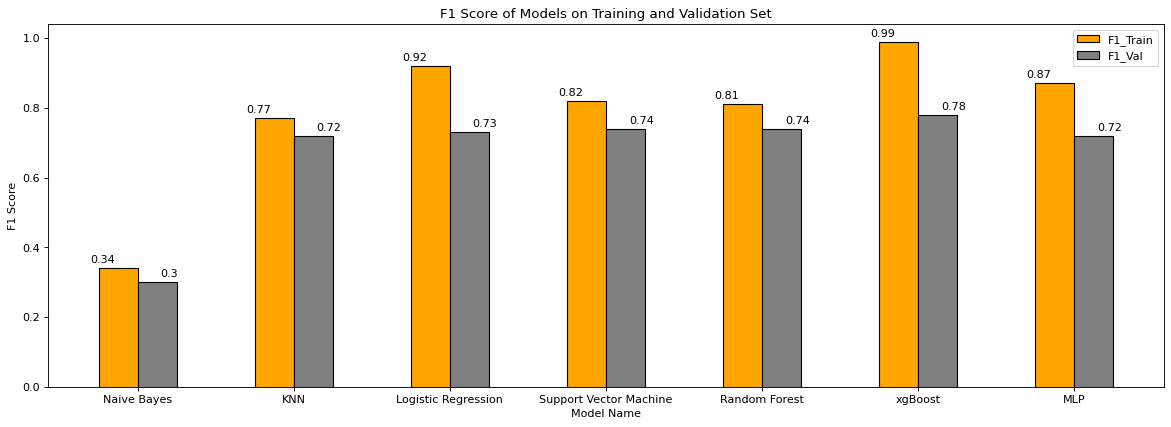

In [ ]:
F1_train = [f1_gnb_train,f1_knn_train,f1_lr_train,f1_svm_train,f1_rf_train,f1_xgb_train,f1_mlp_train]
F1_Val = [f1_gnb_test,f1_knn_test,f1_lr_test,f1_svm_test,f1_rf_test,f1_xgb_test,f1_mlp_test]
  
n=7
r = np.arange(n)
width = 0.25
labels = ['Naive Bayes', 'KNN', 'Logistic Regression', 'Support Vector Machine', 'Random Forest', 'xgBoost','MLP']

fig, ax = plt.subplots(figsize=(18, 6), dpi=80)
##plt.figure(figsize=(18, 6), dpi=80)

train = ax.bar(r, F1_train, color = 'Orange',
        width = width, edgecolor = 'black', label='F1_Train')
test = ax.bar(r + width, F1_Val, color = 'Grey',
        width = width, edgecolor = 'black',
        label='F1_Val')

ax.set_xlabel("Model Name")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score of Models on Training and Validation Set")
  
# plt.grid(linestyle='--')
ax.set_xticks(r + width/2)
ax.set_xticklabels((labels))
ax.legend()

autolabel(train, "left")
autolabel(test, "right")
plt.show()

In [ ]:
F1_train

[0.34, 0.77, 0.92, 0.82, 0.81, 0.99, 0.87]

In [ ]:
F1_Val

[0.3, 0.72, 0.73, 0.74, 0.74, 0.78, 0.72]

In [ ]:
model_val_f1_results

[0.29631740528059003,
 0.7176146646003725,
 0.7323608416629609,
 0.7385779654237005,
 0.7415582190502099,
 0.7767366750360674]

# Final Model Classification Report

In [ ]:
y_proba_xgb = xgb_random.best_estimator_.predict_proba(X_test)

In [ ]:
classes = xgb_random.best_estimator_.classes_

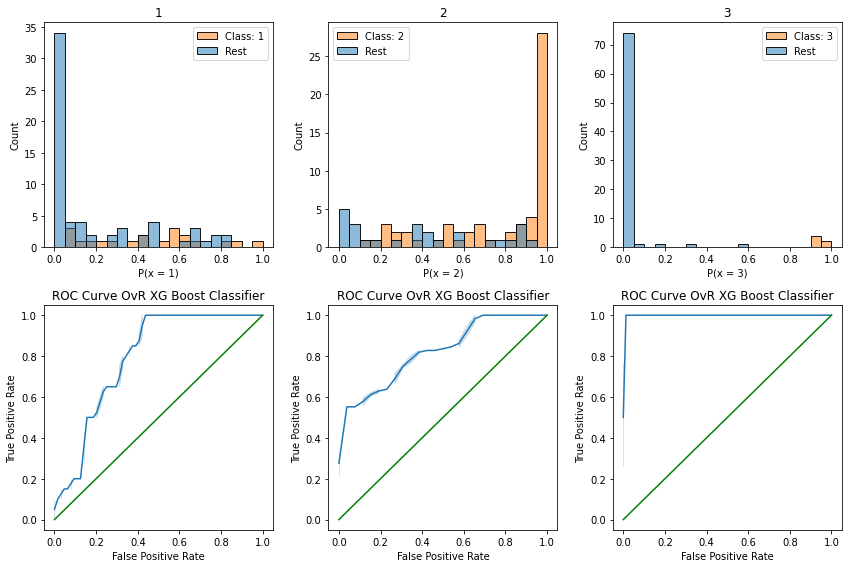

In [ ]:
#@title ROC and AUC visualization

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba_xgb[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR XG Boost Classifier")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [ ]:
xgb_matrix =  confusion_matrix(y_test, xgb_random.best_estimator_.predict(X_test))

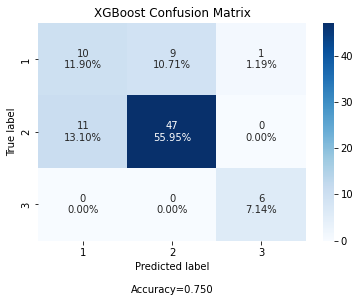

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['1', '2','3']
make_confusion_matrix(xgb_matrix, 
                      group_names=labels,
                      categories=categories,
                      title='XGBoost Confusion Matrix')

In [ ]:
#check the performance on the test set.
y_true, xgb_pred = y_test ,  xgb_random.best_estimator_.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, xgb_pred))

Results on the test set:
              precision    recall  f1-score   support

           1       0.48      0.50      0.49        20
           2       0.84      0.81      0.82        58
           3       0.86      1.00      0.92         6

    accuracy                           0.75        84
   macro avg       0.72      0.77      0.75        84
weighted avg       0.75      0.75      0.75        84



In [ ]:
final_model =  xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.3, max_depth=2, min_child_weight=5, objective='multi:softprob')

In [ ]:
X_train_scaled = preprocessor.fit_transform(X_train)

In [ ]:
X_train_scaled_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_scaled_sm_df = pd.DataFrame(X_train_scaled_sm, columns = X_train.columns)

In [ ]:
X_test_scaled = preprocessor.transform(X_test)

In [ ]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
final_model.fit(X_train_scaled_sm_df, y_train_sm)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, max_depth=2, min_child_weight=5,
              objective='multi:softprob')

In [ ]:
f1_score(y_test, final_model.predict(X_test_scaled_df), average = 'weighted')

0.7514181012255466

In [ ]:
orig_feature_names = X_train.columns
final_model.get_booster().feature_names = orig_feature_names

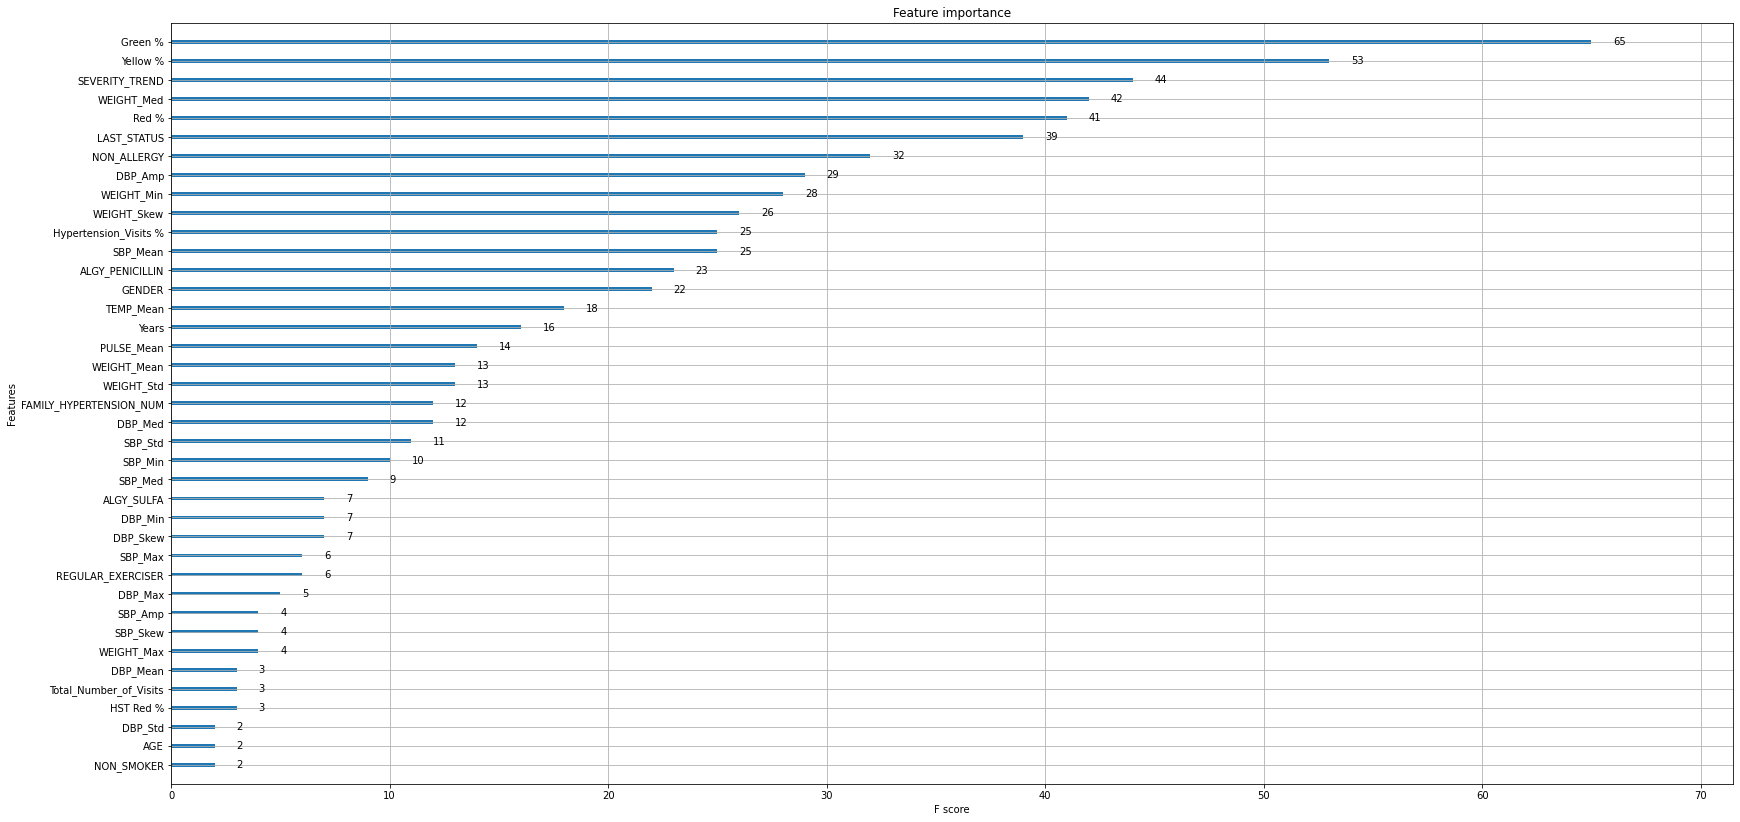

In [ ]:
plt.rcParams["figure.figsize"] = (28, 14)
plot_importance(final_model)
plt.show()

In [ ]:
def plot_pdp(model, X, feature, target=False, return_pd=False, y_pct=True, figsize=(10,9), norm_hist=True, dec=.5):
    # Get partial dependence
    pardep = partial_dependence(model, X, [feature])
    
    # Get min & max values
    xmin = pardep[1][0].min()
    xmax = pardep[1][0].max()
    ymin = pardep[0][0].min()
    ymax = pardep[0][0].max()
    
    # Create figure
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.grid(alpha=.5, linewidth=1)
    
    # Plot partial dependence
    color = 'tab:blue'
    ax1.plot(pardep[1][0], pardep[0][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel(feature, fontsize=14)
    
    tar_ylabel = ': {}'.format(target) if target else ''
    ax1.set_ylabel('Partial Dependence{}'.format(tar_ylabel), color=color, fontsize=14)
    
    tar_title = target if target else 'Target Variable'
    ax1.set_title('Relationship Between {} and {}'.format(feature, tar_title), fontsize=16)
    
    if y_pct and ymin>=0 and ymax<=1:
        # Display yticks on ax1 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax1.set_yticklabels(labels)
    
    # Plot line for decision boundary
    ax1.hlines(dec, xmin=xmin, xmax=xmax, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    ax1.legend()

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.hist(X[feature], bins=80, range=(xmin, xmax), alpha=.25, color=color, density=norm_hist)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('Distribution', color=color, fontsize=14)
    
    if y_pct and norm_hist:
        # Display yticks on ax2 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax2.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax2.set_yticklabels(labels)

    plt.show()
    
    if return_pd:
        return pardep

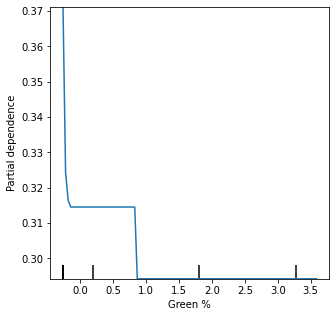

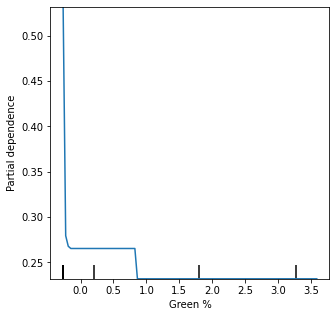

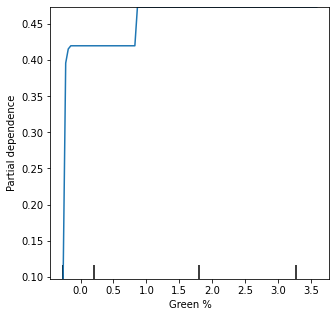

In [ ]:
#https://towardsdatascience.com/prettifying-partial-density-plots-in-python-1f7216937ff
plt.rcParams["figure.figsize"] = (5, 5)
plot_partial_dependence(final_model, X_train_scaled_sm_df, ['Green %'], target = 1)
plot_partial_dependence(final_model, X_train_scaled_sm_df, ['Green %'], target = 2)
plot_partial_dependence(final_model, X_train_scaled_sm_df, ['Green %'], target = 3)
plt.show()

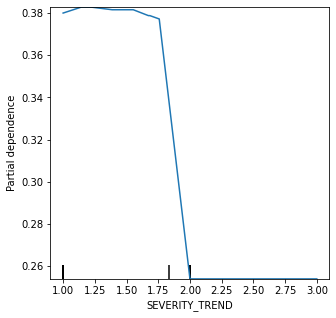

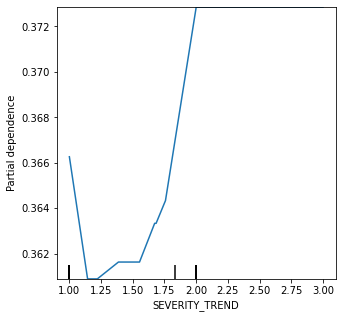

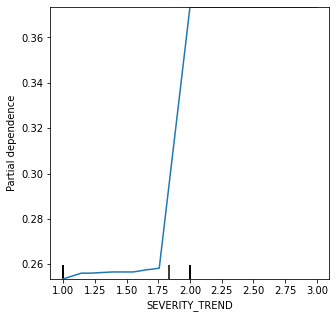

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
plot_partial_dependence(final_model, X_train_scaled_sm_df, ['SEVERITY_TREND'], target = 1)
plot_partial_dependence(final_model, X_train_scaled_sm_df, ['SEVERITY_TREND'], target = 2)
plot_partial_dependence(final_model, X_train_scaled_sm_df, ['SEVERITY_TREND'], target = 3)
plt.show()